In [1]:
import os, re
import pandas as pd
from datetime import datetime

In [7]:
delhi_df = pd.read_csv("data/delhi_air_quality_feature_store_unprocessed.csv")
delhi_df.head()

,location_id,city,event_timestamp,temperature,humidity,pressure,wind_speed,wind_direction,pm25,pm10,no2,so2,o3,co,aqi
0,"Delhi Institute of Tool Engineering, Wazirpur,...",Wazirpur,2000-03-15 13:44:28.651396,30.450,74.100,990.425,0.300,21.7,252.0,332.0,62.4,4.8,22.4,35.7,332
1,"Satyawati College, Delhi, Delhi, India",Delhi,2000-03-15 13:44:28.651396,26.675,74.350,980.650,1.375,55.3,256.0,234.0,59.2,11.9,2.1,33.8,256
2,"ITI Shahdra, Jhilmil Industrial Area, Delhi, D...",Jhilmil,2000-03-15 13:44:28.651396,28.775,62.925,984.350,0.300,221.3,265.0,210.0,48.3,5.1,8.2,35.1,265
3,"Sonia Vihar Water Treatment Plant DJB, Delhi, ...",Sonia Vihar,2000-03-15 13:44:28.651396,26.575,78.525,991.300,0.300,313.6,251.0,177.0,16.5,1.8,1.7,24.9,251
4,"PGDAV College, Sriniwaspuri, Delhi, Delhi, India",Sriniwaspuri,2000-03-15 13:44:28.651396,22.300,71.425,985.650,0.300,347.1,282.0,347.0,43.1,5.2,3.4,29.9,347


In [13]:
len(delhi_df['location_id'].unique())

21

In [14]:
delhi_df.isnull().sum()

location_id              0
city                     0
event_timestamp          0
temperature        1508598
humidity           1508598
pressure           1508598
wind_speed          646542
wind_direction     1724112
pm25                646542
pm10                862056
no2                 431028
so2                1293084
o3                  431028
co                  431028
aqi                      0
dtype: int64

In [15]:
delhi_df.dtypes

location_id         object
city                object
event_timestamp     object
temperature        float64
humidity           float64
pressure           float64
wind_speed         float64
wind_direction     float64
pm25               float64
pm10               float64
no2                float64
so2                float64
o3                 float64
co                 float64
aqi                 object
dtype: object

In [18]:
delhi_df['event_timestamp'] = pd.to_datetime(delhi_df['event_timestamp'])

filtered_df = delhi_df[
    (delhi_df['event_timestamp'] >= '2024-01-01') &
    (delhi_df['event_timestamp'] < '2024-12-02')
]

In [20]:
filtered_df.head()
filtered_df.to_csv("data/delhi_air_quality_2024.csv", index=False)

In [21]:
nasa_df = pd.read_csv(r"A:\Software Projects\Delhi-AQI-Model\data\fire_archive_J1V-C2_696273.csv")
nasa_df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,25.39488,91.32134,326.99,0.52,0.67,2024-01-01,613,N20,VIIRS,n,2,288.68,5.23,D,0
1,23.77677,94.15546,327.00,0.38,0.58,2024-01-01,613,N20,VIIRS,n,2,295.45,2.07,D,0
2,25.39434,91.32460,333.95,0.52,0.67,2024-01-01,613,N20,VIIRS,n,2,286.02,4.16,D,0
3,24.82792,93.75638,339.55,0.38,0.59,2024-01-01,613,N20,VIIRS,n,2,288.58,4.46,D,0
4,24.67892,94.56968,330.12,0.34,0.56,2024-01-01,613,N20,VIIRS,n,2,293.73,2.29,D,0


In [22]:
lat_min, lat_max = 29.5, 32.5
lon_min, lon_max = 73.5, 76.9

punjab_df = nasa_df[
    (nasa_df['latitude'] >= lat_min) & (nasa_df['latitude'] <= lat_max) &
    (nasa_df['longitude'] >= lon_min) & (nasa_df['longitude'] <= lon_max)
]

punjab_df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
796,31.59105,76.71239,333.82,0.38,0.36,2024-01-01,756,N20,VIIRS,n,2,296.47,2.60,D,0
808,32.42054,76.44252,347.59,0.38,0.36,2024-01-01,756,N20,VIIRS,n,2,289.27,11.36,D,0
809,32.41993,76.43851,352.37,0.38,0.36,2024-01-01,756,N20,VIIRS,n,2,308.38,17.32,D,0
810,32.42319,76.43782,329.83,0.38,0.36,2024-01-01,756,N20,VIIRS,n,2,285.61,17.32,D,0
811,32.42258,76.43382,342.17,0.38,0.36,2024-01-01,756,N20,VIIRS,n,2,300.39,17.32,D,0


In [27]:
# len(punjab_df)
# max(punjab_df['bright_t31'])
# max(punjab_df['frp'])
punjab_df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [26]:
punjab_df.to_csv("data/punjab_fires_2024.csv", index=False)

In [31]:
# punjab_df['acq_time'].unique()
# len(punjab_df['longitude'].unique())
# len(punjab_df['latitude'].unique())
len(punjab_df['acq_date'].unique())

332

In [35]:
wind_df = pd.read_csv("data/wind_speed_tel_hr_punjab_sw_pb_1970_2025.csv")
wind_df.head()

,SlNo,Station,Agency,State LGD Code,State,District LGD Code,District,Tehsil,Block,Village,River,Basin,Tributary,Subtributary,SubSubtributary,Local River,Latitude,Longitude,Data Acquisition Time,Telemetry Hourly Wind Speed (Km/Hr)
0,1,Abohar,Punjab SW,3,Punjab,31,FEROZEPUR,Abohar,-,-,Satluj,Indus,-,-,-,Satluj,30.140833,74.207778,27-12-1999 00:00,0.0
1,2,Abohar,Punjab SW,3,Punjab,31,FEROZEPUR,Abohar,-,-,Satluj,Indus,-,-,-,Satluj,30.140833,74.207778,28-12-1999 00:00,0.0
2,3,Abohar,Punjab SW,3,Punjab,31,FEROZEPUR,Abohar,-,-,Satluj,Indus,-,-,-,Satluj,30.140833,74.207778,29-12-1999 00:00,0.0
3,4,Abohar,Punjab SW,3,Punjab,31,FEROZEPUR,Abohar,-,-,Satluj,Indus,-,-,-,Satluj,30.140833,74.207778,30-12-1999 00:00,0.0
4,5,Abohar,Punjab SW,3,Punjab,31,FEROZEPUR,Abohar,-,-,Satluj,Indus,-,-,-,Satluj,30.140833,74.207778,12-04-2021 18:57,40.4


In [36]:
wind_df['Data Acquisition Time'] = pd.to_datetime(wind_df['Data Acquisition Time'])

C:\Users\Atharva Taras\AppData\Local\Temp\ipykernel_20544\52133949.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  wind_df['Data Acquisition Time'] = pd.to_datetime(wind_df['Data Acquisition Time'])


In [37]:
wind_2024_df = wind_df[
	(wind_df['Data Acquisition Time'] >= '2024-01-01') &
	(wind_df['Data Acquisition Time'] < '2025-01-01')
]

In [39]:
wind_2024_df.head()
len(wind_2024_df)

7369

In [40]:
wind_2024_df.to_csv("data/wind_speed_punjab_2024.csv", index=False)

# Preprocess

In [2]:
import os, re
import pandas as pd
from datetime import datetime

In [3]:
wind_df = pd.read_csv("data/wind_speed_punjab_2024.csv")
wind_df.drop(columns=['Tehsil', 'Block', 'River', 'Basin', 'Tributary', 'Subtributary', 'SubSubtributary', 'Local River'], inplace=True)
wind_df.head(2)

,SlNo,Station,Agency,State LGD Code,State,District LGD Code,District,Village,Latitude,Longitude,Data Acquisition Time,Telemetry Hourly Wind Speed (Km/Hr)
0,51357,"RSD Dam Site, Punjab",Punjab SW,3,Punjab,662,PATHANKOT,-,32.443262,75.731494,2024-01-05 10:00:00,0.0
1,51358,"RSD Dam Site, Punjab",Punjab SW,3,Punjab,662,PATHANKOT,-,32.443262,75.731494,2024-01-05 11:00:00,0.0


In [4]:
wind_df.isnull().sum()

SlNo                                   0
Station                                0
Agency                                 0
State LGD Code                         0
State                                  0
District LGD Code                      0
District                               0
Village                                0
Latitude                               0
Longitude                              0
Data Acquisition Time                  0
Telemetry Hourly Wind Speed (Km/Hr)    0
dtype: int64

In [5]:
fire_df = pd.read_csv("data/punjab_fires_2024.csv")
fire_df.head(2)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,31.59105,76.71239,333.82,0.38,0.36,2024-01-01,756,N20,VIIRS,n,2,296.47,2.60,D,0
1,32.42054,76.44252,347.59,0.38,0.36,2024-01-01,756,N20,VIIRS,n,2,289.27,11.36,D,0


In [6]:
fire_df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [7]:
aqi_df = pd.read_csv("data/delhi_air_quality_2024.csv")
aqi_df = aqi_df[['event_timestamp', 'aqi', 'city', 'location_id']]
aqi_df.head(2)

,event_timestamp,aqi,city,location_id
0,2024-01-01 00:44:28.651396,195,Wazirpur,"Delhi Institute of Tool Engineering, Wazirpur,..."
1,2024-01-01 00:44:28.651396,207,Jhilmil,"ITI Shahdra, Jhilmil Industrial Area, Delhi, D..."


In [28]:
print(len(aqi_df))
aqi_df.isnull().sum()

148601


event_timestamp    0
aqi                0
city               0
location_id        0
dtype: int64

In [29]:
aqi_df.columns

Index(['event_timestamp', 'aqi', 'city', 'location_id'], dtype='object')

In [8]:
! uv pip install -q matplotlib seaborn scipy

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy.spatial.distance import cdist
from scipy import stats

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# STEP 1: LOAD AND PREPARE DATA
# ============================================================================

print("Loading datasets...")

# Load your data (replace with your actual file paths)
# wind_df = pd.read_csv('wind_data.csv')
# fire_df = pd.read_csv('fire_data.csv')
# aqi_df = pd.read_csv('aqi_data.csv')

print(f"Wind data shape: {wind_df.shape}")
print(f"Fire data shape: {fire_df.shape}")
print(f"AQI data shape: {aqi_df.shape}")

# Quick data inspection
print("\n=== DATA INSPECTION ===")
print("\nAQI Data Types:")
print(aqi_df.dtypes)
print("\nAQI Sample Values:")
print(aqi_df[['aqi', 'pm25', 'pm10', 'wind_speed']].head())
print("\nChecking for non-numeric values in AQI column:")
print(aqi_df['aqi'].apply(lambda x: isinstance(x, str)).sum(), "string values found")

# ============================================================================
# STEP 2: DATA PREPROCESSING
# ============================================================================

print("\nPreprocessing data...")

# Process Wind Data
wind_df['Data Acquisition Time'] = pd.to_datetime(wind_df['Data Acquisition Time'])
wind_df['date'] = wind_df['Data Acquisition Time'].dt.date

# Clean wind speed column
wind_df['Telemetry Hourly Wind Speed (Km/Hr)'] = pd.to_numeric(
    wind_df['Telemetry Hourly Wind Speed (Km/Hr)'], errors='coerce'
)
wind_df = wind_df.dropna(subset=['Telemetry Hourly Wind Speed (Km/Hr)'])

# Process Fire Data
fire_df['acq_date'] = pd.to_datetime(fire_df['acq_date'])
fire_df['date'] = fire_df['acq_date'].dt.date
fire_df['datetime'] = pd.to_datetime(
    fire_df['acq_date'].astype(str) + ' ' + 
    fire_df['acq_time'].astype(str).str.zfill(4).str[:2] + ':' + 
    fire_df['acq_time'].astype(str).str.zfill(4).str[2:]
)

# Clean fire data numeric columns
fire_numeric_cols = ['latitude', 'longitude', 'brightness', 'scan', 'track', 'bright_t31', 'frp']
for col in fire_numeric_cols:
    if col in fire_df.columns:
        fire_df[col] = pd.to_numeric(fire_df[col], errors='coerce')

# Remove rows with missing critical fire data
fire_df = fire_df.dropna(subset=['latitude', 'longitude', 'frp'])

# Process AQI Data
aqi_df['event_timestamp'] = pd.to_datetime(aqi_df['event_timestamp'])
aqi_df['date'] = aqi_df['event_timestamp'].dt.date

# Convert numeric columns to proper types and handle errors
numeric_cols = ['aqi']

print("\nCleaning AQI data...")
for col in numeric_cols:
    if col in aqi_df.columns:
        # Convert to numeric, forcing errors to NaN
        aqi_df[col] = pd.to_numeric(aqi_df[col], errors='coerce')
        
# Remove rows where critical columns are NaN
critical_cols = ['aqi']
before_count = len(aqi_df)
aqi_df = aqi_df.dropna(subset=critical_cols)
after_count = len(aqi_df)
print(f"Removed {before_count - after_count} rows with missing critical data")
print(f"Remaining AQI records: {after_count}")

# Delhi approximate coordinates
DELHI_LAT, DELHI_LON = 28.6139, 77.2090

# Calculate distance from fires to Delhi
fire_df['distance_to_delhi'] = np.sqrt(
    (fire_df['latitude'] - DELHI_LAT)**2 + 
    (fire_df['longitude'] - DELHI_LON)**2
) * 111  # Approximate km per degree

# ============================================================================
# STEP 3: AGGREGATE DATA FOR ANALYSIS
# ============================================================================

print("\nAggregating data...")

# Daily fire statistics
daily_fires = fire_df.groupby('date').agg({
    'latitude': 'count',
    'frp': ['mean', 'sum'],
    'distance_to_delhi': 'mean'
}).reset_index()
daily_fires.columns = ['date', 'fire_count', 'avg_frp', 'total_frp', 'avg_distance']

# Daily AQI statistics
daily_aqi = aqi_df.groupby('date').agg({
    'aqi': ['mean', 'max', 'min'],
    # 'pm25': ['mean', 'max'],
    # 'pm10': ['mean', 'max'],
    # 'wind_speed': 'mean',
    # 'wind_direction': 'mean'
}).reset_index()
daily_aqi.columns = ['date', 'avg_aqi', 'max_aqi', 'min_aqi', 
                    #   'avg_pm25', 'max_pm25', 'avg_pm10', 'max_pm10',
                    #   'avg_wind_speed', 'avg_wind_direction'
                      ]

# Daily wind statistics (Punjab)
daily_wind = wind_df.groupby('date').agg({
    'Telemetry Hourly Wind Speed (Km/Hr)': ['mean', 'max', 'std']
}).reset_index()
daily_wind.columns = ['date', 'avg_wind_speed', 'max_wind_speed', 'std_wind_speed']

# Merge all datasets
merged_df = daily_aqi.merge(daily_fires, on='date', how='left')
merged_df = merged_df.merge(daily_wind, on='date', how='left')
merged_df = merged_df.fillna(0)

print(f"\nMerged data shape: {merged_df.shape}")
print(f"Date range: {merged_df['date'].min()} to {merged_df['date'].max()}")

# ============================================================================
# STEP 4: VISUALIZATIONS
# ============================================================================

print("\nCreating visualizations...\n")

# Create a large figure with multiple subplots
fig = plt.figure(figsize=(20, 24))

# -------------------------
# Plot 1: Time Series Overview
# -------------------------
ax1 = plt.subplot(6, 2, 1)
ax1_twin = ax1.twinx()

dates = pd.to_datetime(merged_df['date'])
ax1.plot(dates, merged_df['avg_aqi'], 'r-', linewidth=2, label='Avg AQI (Delhi)')
ax1_twin.bar(dates, merged_df['fire_count'], alpha=0.3, color='orange', label='Fire Count (Punjab)')

ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('AQI', color='r', fontsize=10)
ax1_twin.set_ylabel('Fire Count', color='orange', fontsize=10)
ax1.set_title('Delhi AQI vs Punjab Fire Count Over Time', fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='r')
ax1_twin.tick_params(axis='y', labelcolor='orange')
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# -------------------------
# Plot 2: Fire Radiative Power vs AQI
# -------------------------
ax2 = plt.subplot(6, 2, 2)
ax2_twin = ax2.twinx()

ax2.plot(dates, merged_df['total_frp'], 'g-', linewidth=2, label='Total FRP (Punjab)')
ax2_twin.plot(dates, merged_df['avg_aqi'], 'r--', linewidth=2, label='Avg AQI (Delhi)')

ax2.set_xlabel('Date', fontsize=10)
ax2.set_ylabel('Fire Radiative Power', color='g', fontsize=10)
ax2_twin.set_ylabel('AQI', color='r', fontsize=10)
ax2.set_title('Fire Intensity (FRP) vs Delhi AQI', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='g')
ax2_twin.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# -------------------------
# Plot 3: Wind Speed Patterns
# -------------------------
ax3 = plt.subplot(6, 2, 3)
ax3_twin = ax3.twinx()

ax3.plot(dates, merged_df['avg_wind_speed'], 'b-', linewidth=2, label='Punjab Wind Speed')
ax3_twin.plot(dates, merged_df['avg_aqi'], 'r-', linewidth=2, alpha=0.6, label='Delhi AQI')

ax3.set_xlabel('Date', fontsize=10)
ax3.set_ylabel('Wind Speed (km/h)', color='b', fontsize=10)
ax3_twin.set_ylabel('AQI', color='r', fontsize=10)
ax3.set_title('Punjab Wind Speed vs Delhi AQI', fontsize=12, fontweight='bold')
ax3.tick_params(axis='y', labelcolor='b')
ax3_twin.tick_params(axis='y', labelcolor='r')
ax3.legend(loc='upper left')
ax3_twin.legend(loc='upper right')
ax3.grid(True, alpha=0.3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

# -------------------------
# Plot 4: Correlation Heatmap
# -------------------------
ax4 = plt.subplot(6, 2, 4)
correlation_cols = ['avg_aqi', 'fire_count', 'total_frp', 'avg_pm25', 
                    'avg_pm10', 'avg_wind_speed', 'avg_distance']
corr_matrix = merged_df[correlation_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, ax=ax4, cbar_kws={'shrink': 0.8})
ax4.set_title('Correlation Matrix: Fire & Wind vs AQI', fontsize=12, fontweight='bold')

# -------------------------
# Plot 5: Scatter - Fire Count vs AQI
# -------------------------
ax5 = plt.subplot(6, 2, 5)
scatter = ax5.scatter(merged_df['fire_count'], merged_df['avg_aqi'], 
                      c=merged_df['avg_wind_speed'], cmap='viridis', 
                      s=100, alpha=0.6, edgecolors='black')
ax5.set_xlabel('Fire Count (Punjab)', fontsize=10)
ax5.set_ylabel('Average AQI (Delhi)', fontsize=10)
ax5.set_title('Fire Count vs AQI (colored by wind speed)', fontsize=12, fontweight='bold')
plt.colorbar(scatter, ax=ax5, label='Wind Speed (km/h)')
ax5.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(merged_df['fire_count'], merged_df['avg_aqi'], 1)
p = np.poly1d(z)
ax5.plot(merged_df['fire_count'], p(merged_df['fire_count']), 
         "r--", alpha=0.8, linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')
ax5.legend()

# -------------------------
# Plot 6: Scatter - FRP vs AQI
# -------------------------
ax6 = plt.subplot(6, 2, 6)
scatter2 = ax6.scatter(merged_df['total_frp'], merged_df['avg_aqi'], 
                       c=merged_df['avg_distance'], cmap='plasma', 
                       s=100, alpha=0.6, edgecolors='black')
ax6.set_xlabel('Total Fire Radiative Power (Punjab)', fontsize=10)
ax6.set_ylabel('Average AQI (Delhi)', fontsize=10)
ax6.set_title('Fire Intensity vs AQI (colored by distance)', fontsize=12, fontweight='bold')
plt.colorbar(scatter2, ax=ax6, label='Avg Distance to Delhi (km)')
ax6.grid(True, alpha=0.3)

# -------------------------
# Plot 7: PM2.5 and PM10 Patterns
# -------------------------
ax7 = plt.subplot(6, 2, 7)
ax7.plot(dates, merged_df['avg_pm25'], 'purple', linewidth=2, label='PM2.5', marker='o', markersize=3)
ax7.plot(dates, merged_df['avg_pm10'], 'brown', linewidth=2, label='PM10', marker='s', markersize=3)
ax7.set_xlabel('Date', fontsize=10)
ax7.set_ylabel('Concentration (μg/m³)', fontsize=10)
ax7.set_title('Particulate Matter Levels in Delhi', fontsize=12, fontweight='bold')
ax7.legend()
ax7.grid(True, alpha=0.3)
plt.setp(ax7.xaxis.get_majorticklabels(), rotation=45)

# -------------------------
# Plot 8: Fire Distribution Histogram
# -------------------------
ax8 = plt.subplot(6, 2, 8)
ax8.hist(merged_df['fire_count'], bins=30, color='orange', alpha=0.7, edgecolor='black')
ax8.set_xlabel('Number of Fires per Day', fontsize=10)
ax8.set_ylabel('Frequency', fontsize=10)
ax8.set_title('Distribution of Daily Fire Counts', fontsize=12, fontweight='bold')
ax8.axvline(merged_df['fire_count'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {merged_df["fire_count"].mean():.1f}')
ax8.legend()
ax8.grid(True, alpha=0.3)

# -------------------------
# Plot 9: Geographic Fire Distribution
# -------------------------
ax9 = plt.subplot(6, 2, 9)
scatter3 = ax9.scatter(fire_df['longitude'], fire_df['latitude'], 
                       c=fire_df['frp'], cmap='hot', s=20, alpha=0.5)
ax9.scatter(DELHI_LON, DELHI_LAT, c='blue', s=500, marker='*', 
            edgecolors='white', linewidths=2, label='Delhi', zorder=5)
ax9.set_xlabel('Longitude', fontsize=10)
ax9.set_ylabel('Latitude', fontsize=10)
ax9.set_title('Geographic Distribution of Fires (Punjab)', fontsize=12, fontweight='bold')
plt.colorbar(scatter3, ax=ax9, label='Fire Radiative Power')
ax9.legend()
ax9.grid(True, alpha=0.3)

# -------------------------
# Plot 10: Lagged Correlation Analysis
# -------------------------
ax10 = plt.subplot(6, 2, 10)
lags = range(0, 8)
correlations = []

for lag in lags:
    if lag == 0:
        corr = merged_df['fire_count'].corr(merged_df['avg_aqi'])
    else:
        corr = merged_df['fire_count'].iloc[:-lag].corr(merged_df['avg_aqi'].iloc[lag:])
    correlations.append(corr)

ax10.bar(lags, correlations, color='teal', alpha=0.7, edgecolor='black')
ax10.set_xlabel('Lag (days)', fontsize=10)
ax10.set_ylabel('Correlation Coefficient', fontsize=10)
ax10.set_title('Lagged Correlation: Fire Count vs AQI', fontsize=12, fontweight='bold')
ax10.axhline(y=0, color='red', linestyle='--', linewidth=1)
ax10.grid(True, alpha=0.3)

# -------------------------
# Plot 11: Monthly Aggregation
# -------------------------
ax11 = plt.subplot(6, 2, 11)
merged_df['month'] = pd.to_datetime(merged_df['date']).dt.month
monthly_data = merged_df.groupby('month').agg({
    'fire_count': 'sum',
    'avg_aqi': 'mean'
}).reset_index()

ax11_twin = ax11.twinx()
x = monthly_data['month']
ax11.bar(x - 0.2, monthly_data['fire_count'], width=0.4, color='orange', alpha=0.7, label='Total Fires')
ax11_twin.plot(x, monthly_data['avg_aqi'], 'r-o', linewidth=2, markersize=8, label='Avg AQI')

ax11.set_xlabel('Month', fontsize=10)
ax11.set_ylabel('Total Fires', color='orange', fontsize=10)
ax11_twin.set_ylabel('Average AQI', color='r', fontsize=10)
ax11.set_title('Monthly Fire Activity vs AQI', fontsize=12, fontweight='bold')
ax11.set_xticks(x)
ax11.tick_params(axis='y', labelcolor='orange')
ax11_twin.tick_params(axis='y', labelcolor='r')
ax11.legend(loc='upper left')
ax11_twin.legend(loc='upper right')
ax11.grid(True, alpha=0.3)

# -------------------------
# Plot 12: AQI Categories Distribution
# -------------------------
ax12 = plt.subplot(6, 2, 12)

# Define AQI categories
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

aqi_df['aqi_category'] = aqi_df['aqi'].apply(categorize_aqi)
category_counts = aqi_df['aqi_category'].value_counts()

colors_map = {'Good': 'green', 'Moderate': 'yellow', 'Unhealthy for Sensitive': 'orange',
              'Unhealthy': 'red', 'Very Unhealthy': 'purple', 'Hazardous': 'maroon'}
colors = [colors_map.get(cat, 'gray') for cat in category_counts.index]

ax12.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
         colors=colors, startangle=90)
ax12.set_title('Distribution of AQI Categories in Delhi', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('fire_aqi_analysis.png', dpi=300, bbox_inches='tight')
print("Figure saved as 'fire_aqi_analysis.png'")
plt.show()

# ============================================================================
# STEP 5: STATISTICAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)

print(f"\n📊 FIRE DATA (Punjab):")
print(f"  • Total fire events: {len(fire_df):,}")
print(f"  • Average daily fires: {merged_df['fire_count'].mean():.1f}")
print(f"  • Peak fire day: {merged_df.loc[merged_df['fire_count'].idxmax(), 'date']} "
      f"({merged_df['fire_count'].max():.0f} fires)")
print(f"  • Average FRP: {fire_df['frp'].mean():.2f}")
print(f"  • Average distance to Delhi: {fire_df['distance_to_delhi'].mean():.1f} km")

print(f"\n🌫️ AQI DATA (Delhi):")
print(f"  • Average AQI: {merged_df['avg_aqi'].mean():.1f}")
print(f"  • Peak AQI day: {merged_df.loc[merged_df['avg_aqi'].idxmax(), 'date']} "
      f"(AQI: {merged_df['avg_aqi'].max():.0f})")
print(f"  • Average PM2.5: {merged_df['avg_pm25'].mean():.2f} μg/m³")
print(f"  • Average PM10: {merged_df['avg_pm10'].mean():.2f} μg/m³")

print(f"\n💨 WIND DATA (Punjab):")
print(f"  • Average wind speed: {merged_df['avg_wind_speed'].mean():.2f} km/h")
print(f"  • Max wind speed: {merged_df['max_wind_speed'].max():.2f} km/h")

print(f"\n🔗 CORRELATIONS:")
print(f"  • Fire Count ↔ AQI: {merged_df['fire_count'].corr(merged_df['avg_aqi']):.3f}")
print(f"  • Total FRP ↔ AQI: {merged_df['total_frp'].corr(merged_df['avg_aqi']):.3f}")
print(f"  • Wind Speed ↔ AQI: {merged_df['avg_wind_speed'].corr(merged_df['avg_aqi']):.3f}")
print(f"  • Fire Distance ↔ AQI: {merged_df['avg_distance'].corr(merged_df['avg_aqi']):.3f}")

# Find optimal lag
best_lag = correlations.index(max(correlations))
print(f"\n⏱️ TEMPORAL ANALYSIS:")
print(f"  • Best lag correlation at {best_lag} days: {max(correlations):.3f}")

print("\n" + "="*80)
print("Analysis complete! Check 'fire_aqi_analysis.png' for visualizations.")
print("="*80)

Loading datasets...
Wind data shape: (7369, 12)
Fire data shape: (46998, 15)
AQI data shape: (148601, 4)

=== DATA INSPECTION ===

AQI Data Types:
event_timestamp    object
aqi                object
city               object
location_id        object
dtype: object

AQI Sample Values:


KeyError: "['pm25', 'pm10', 'wind_speed'] not in index"

Dataset shapes:
Wind data: (7369, 13)
Fire data: (46998, 18)
AQI data: (148601, 4)

Preprocessing data...

Aggregating data...
Merged shape: (310, 11)


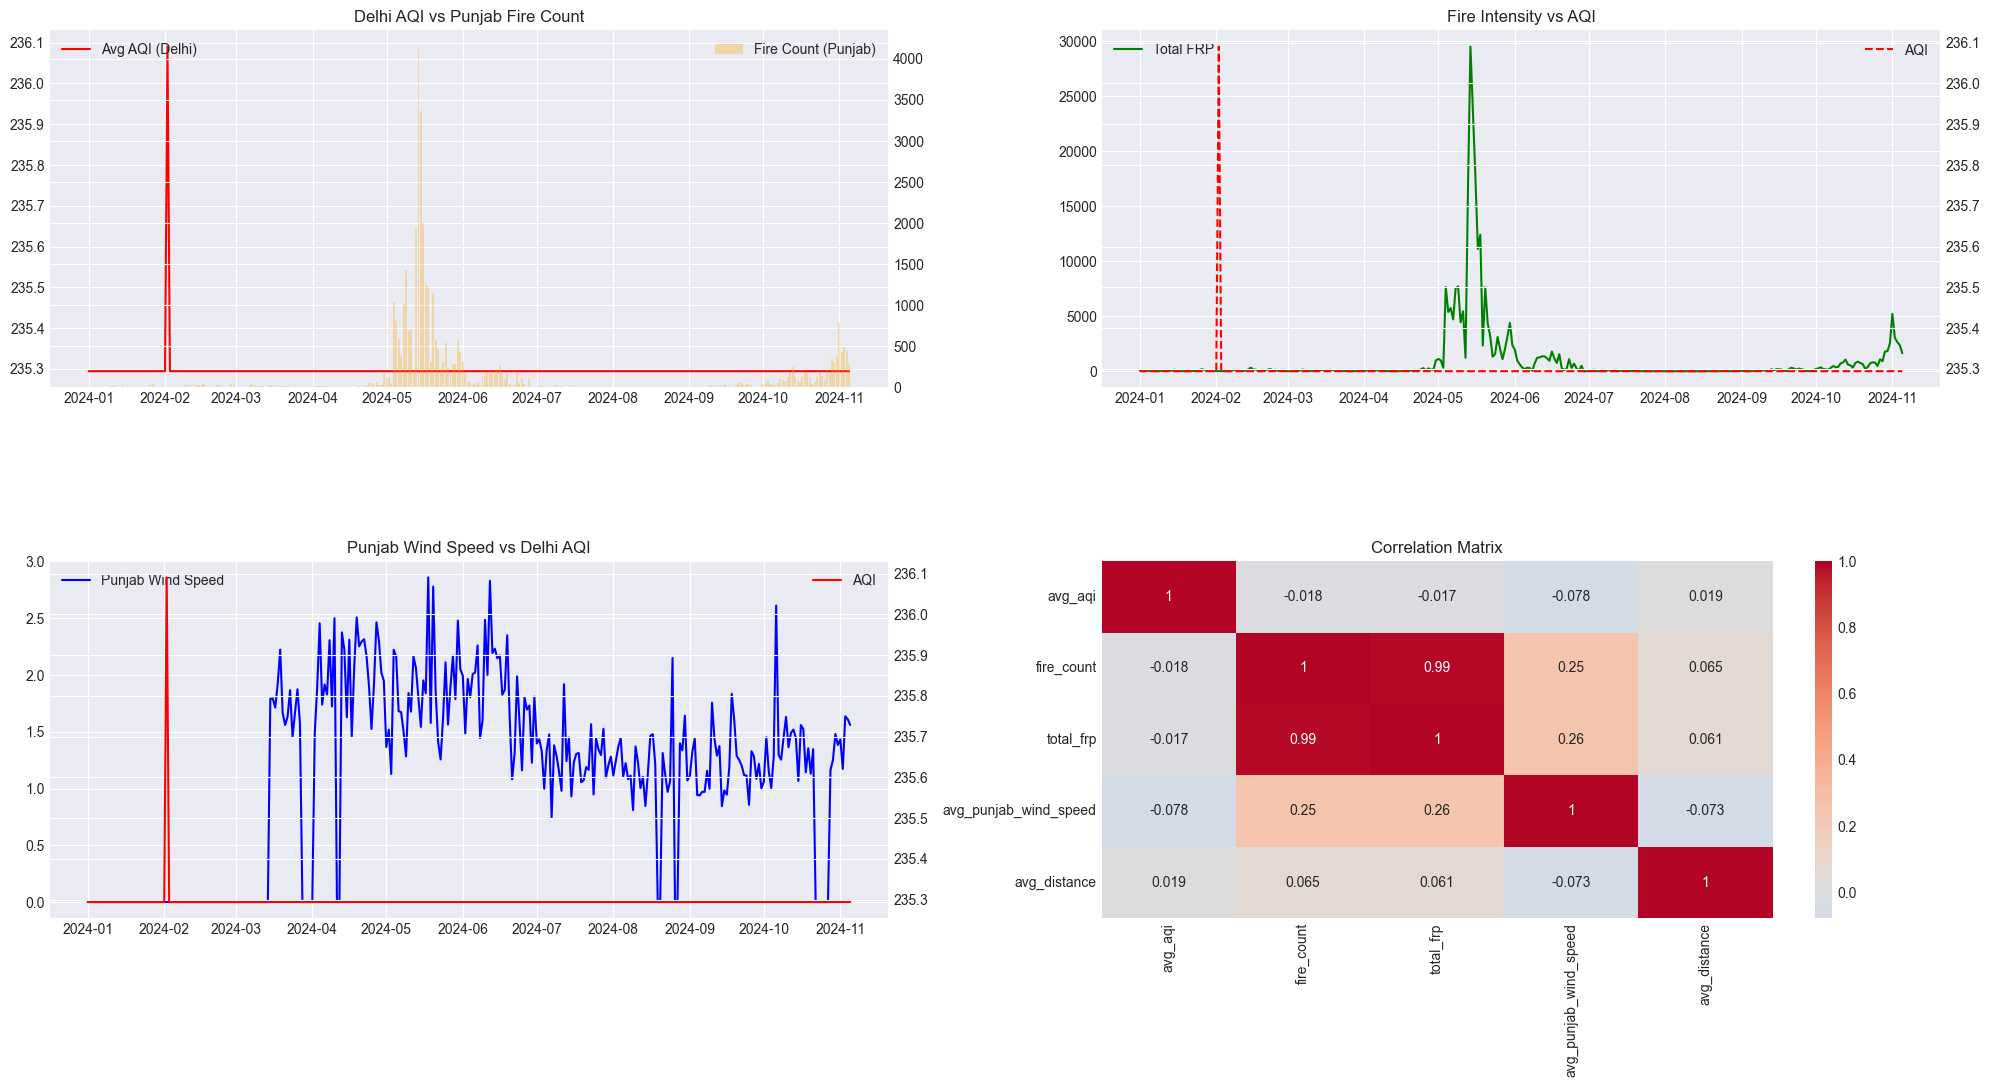


STATISTICAL SUMMARY
Total fire events: 46998
Average daily fires: 126.77
Average AQI: 235.30
Average Punjab wind speed: 1.10

Correlations:
Fire Count ↔ AQI: -0.018134440146694485
Total FRP ↔ AQI: -0.01688254655637374
Wind Speed ↔ AQI: -0.07809614179328861

Analysis complete.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================================
# CONFIG
# =============================================================================
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# =============================================================================
# STEP 1: DATA OVERVIEW
# =============================================================================
print("Dataset shapes:")
print(f"Wind data: {wind_df.shape}")
print(f"Fire data: {fire_df.shape}")
print(f"AQI data: {aqi_df.shape}")

# =============================================================================
# STEP 2: PREPROCESSING
# =============================================================================
print("\nPreprocessing data...")

# ---------------- WIND DATA (Punjab) ----------------
wind_df['Data Acquisition Time'] = pd.to_datetime(wind_df['Data Acquisition Time'])
wind_df['date'] = wind_df['Data Acquisition Time'].dt.date

wind_df['Telemetry Hourly Wind Speed (Km/Hr)'] = pd.to_numeric(
    wind_df['Telemetry Hourly Wind Speed (Km/Hr)'], errors='coerce'
)
wind_df = wind_df.dropna(subset=['Telemetry Hourly Wind Speed (Km/Hr)'])

# ---------------- FIRE DATA (Punjab) ----------------
fire_df['acq_date'] = pd.to_datetime(fire_df['acq_date'])
fire_df['date'] = fire_df['acq_date'].dt.date

fire_df['datetime'] = pd.to_datetime(
    fire_df['acq_date'].astype(str) + ' ' +
    fire_df['acq_time'].astype(str).str.zfill(4).str[:2] + ':' +
    fire_df['acq_time'].astype(str).str.zfill(4).str[2:]
)

fire_numeric_cols = ['latitude', 'longitude', 'brightness', 'scan',
                     'track', 'bright_t31', 'frp']
for col in fire_numeric_cols:
    fire_df[col] = pd.to_numeric(fire_df[col], errors='coerce')

fire_df = fire_df.dropna(subset=['latitude', 'longitude', 'frp'])

# ---------------- AQI DATA (Delhi) ----------------
aqi_df['event_timestamp'] = pd.to_datetime(aqi_df['event_timestamp'])
aqi_df['date'] = aqi_df['event_timestamp'].dt.date

aqi_df['aqi'] = pd.to_numeric(aqi_df['aqi'], errors='coerce')
aqi_df = aqi_df.dropna(subset=['aqi'])

# =============================================================================
# STEP 3: DISTANCE CALCULATION
# =============================================================================
DELHI_LAT, DELHI_LON = 28.6139, 77.2090

fire_df['distance_to_delhi'] = np.sqrt(
    (fire_df['latitude'] - DELHI_LAT) ** 2 +
    (fire_df['longitude'] - DELHI_LON) ** 2
) * 111  # km

# =============================================================================
# STEP 4: DAILY AGGREGATION
# =============================================================================
print("\nAggregating data...")

# ---- Fire aggregation (Punjab)
daily_fires = fire_df.groupby('date').agg(
    fire_count=('latitude', 'count'),
    avg_frp=('frp', 'mean'),
    total_frp=('frp', 'sum'),
    avg_distance=('distance_to_delhi', 'mean')
).reset_index()

# ---- AQI aggregation (Delhi)
daily_aqi = aqi_df.groupby('date').agg(
    avg_aqi=('aqi', 'mean'),
    max_aqi=('aqi', 'max'),
    min_aqi=('aqi', 'min')
).reset_index()

# ---- Wind aggregation (Punjab)
daily_wind = wind_df.groupby('date').agg(
    avg_punjab_wind_speed=('Telemetry Hourly Wind Speed (Km/Hr)', 'mean'),
    max_punjab_wind_speed=('Telemetry Hourly Wind Speed (Km/Hr)', 'max'),
    std_punjab_wind_speed=('Telemetry Hourly Wind Speed (Km/Hr)', 'std')
).reset_index()

# ---- Merge all
merged_df = (
    daily_aqi
    .merge(daily_fires, on='date', how='left')
    .merge(daily_wind, on='date', how='left')
    .fillna(0)
)

print(f"Merged shape: {merged_df.shape}")

# =============================================================================
# STEP 5: VISUALIZATION
# =============================================================================
fig = plt.figure(figsize=(20, 20))
dates = pd.to_datetime(merged_df['date'])

# AQI vs Fire Count
ax1 = plt.subplot(4, 2, 1)
ax1_t = ax1.twinx()
ax1.plot(dates, merged_df['avg_aqi'], 'r-', label='Avg AQI (Delhi)')
ax1_t.bar(dates, merged_df['fire_count'], alpha=0.3, color='orange', label='Fire Count (Punjab)')
ax1.legend(loc='upper left')
ax1_t.legend(loc='upper right')
ax1.set_title('Delhi AQI vs Punjab Fire Count')

# FRP vs AQI
ax2 = plt.subplot(4, 2, 2)
ax2_t = ax2.twinx()
ax2.plot(dates, merged_df['total_frp'], 'g-', label='Total FRP')
ax2_t.plot(dates, merged_df['avg_aqi'], 'r--', label='AQI')
ax2.legend(loc='upper left')
ax2_t.legend(loc='upper right')
ax2.set_title('Fire Intensity vs AQI')

# Wind vs AQI
ax3 = plt.subplot(4, 2, 3)
ax3_t = ax3.twinx()
ax3.plot(dates, merged_df['avg_punjab_wind_speed'], 'b-', label='Punjab Wind Speed')
ax3_t.plot(dates, merged_df['avg_aqi'], 'r-', label='AQI')
ax3.legend(loc='upper left')
ax3_t.legend(loc='upper right')
ax3.set_title('Punjab Wind Speed vs Delhi AQI')

# Correlation Heatmap
ax4 = plt.subplot(4, 2, 4)
corr_cols = [
    'avg_aqi', 'fire_count', 'total_frp',
    'avg_punjab_wind_speed', 'avg_distance'
]
sns.heatmap(
    merged_df[corr_cols].corr(),
    annot=True, cmap='coolwarm', center=0, ax=ax4
)
ax4.set_title('Correlation Matrix')

plt.tight_layout()
plt.savefig('fire_aqi_analysis.png', dpi=300)
plt.show()

# =============================================================================
# STEP 6: SUMMARY
# =============================================================================
print("\nSTATISTICAL SUMMARY")
print(f"Total fire events: {len(fire_df)}")
print(f"Average daily fires: {merged_df['fire_count'].mean():.2f}")
print(f"Average AQI: {merged_df['avg_aqi'].mean():.2f}")
print(f"Average Punjab wind speed: {merged_df['avg_punjab_wind_speed'].mean():.2f}")

print("\nCorrelations:")
print("Fire Count ↔ AQI:",
      merged_df['fire_count'].corr(merged_df['avg_aqi']))
print("Total FRP ↔ AQI:",
      merged_df['total_frp'].corr(merged_df['avg_aqi']))
print("Wind Speed ↔ AQI:",
      merged_df['avg_punjab_wind_speed'].corr(merged_df['avg_aqi']))

print("\nAnalysis complete.")


In [11]:
aqi_df.columns

Index(['event_timestamp', 'aqi', 'city', 'location_id', 'date', 'hour'], dtype='object')

C:\Users\Atharva Taras\AppData\Local\Temp\ipykernel_27328\1930079196.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax3.boxplot(monthly_data, labels=sorted(aqi_df['month'].unique()))


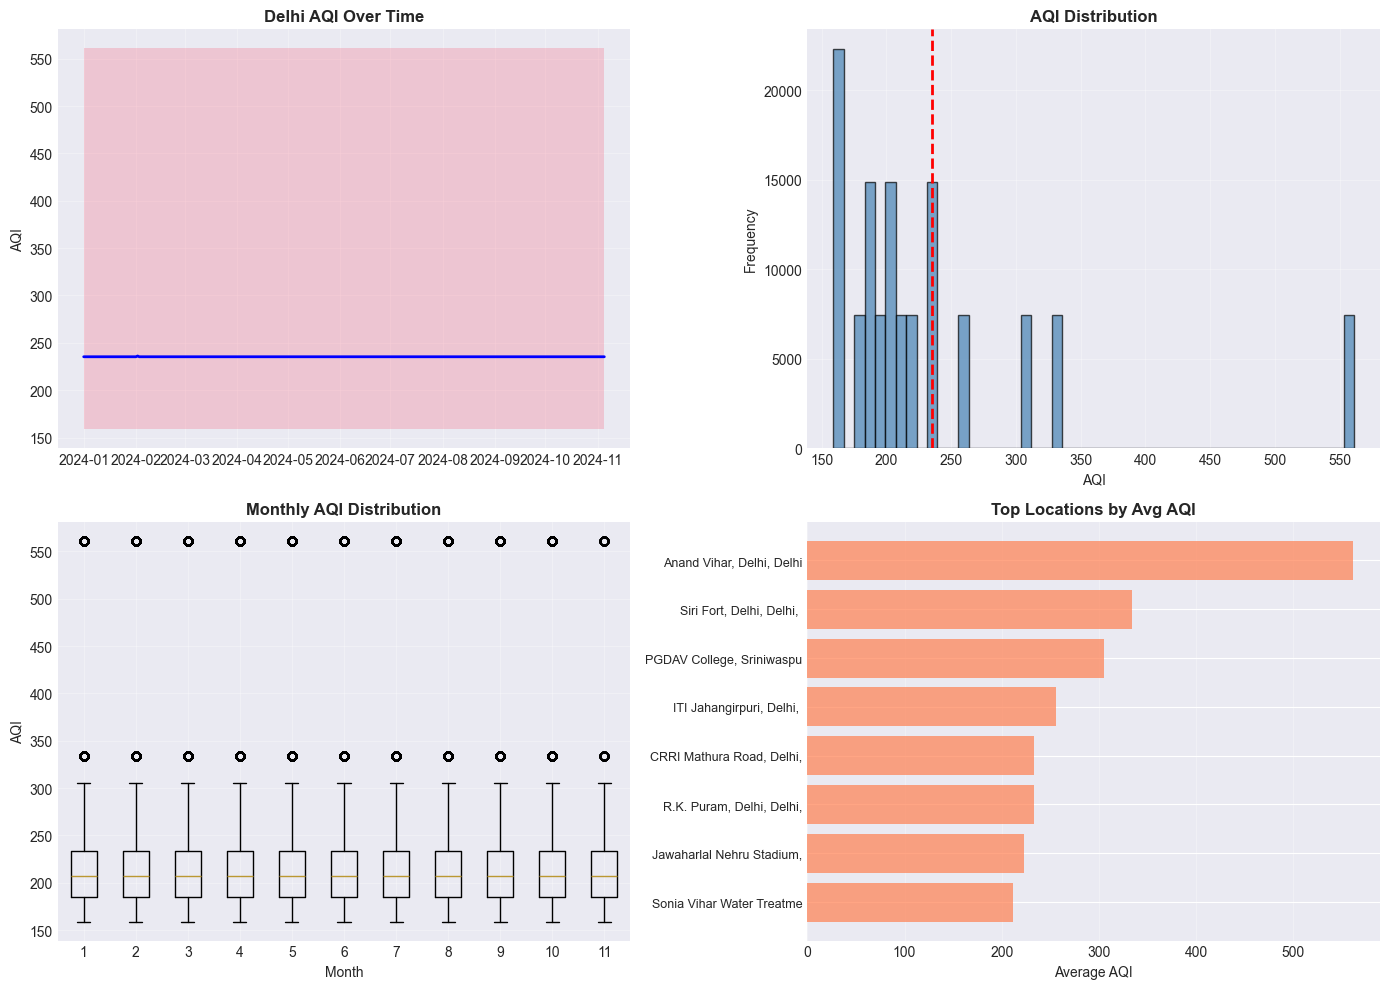

AQI Stats - Mean: 235.3, Max: 561, Min: 159


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
# aqi_df = pd.read_csv('aqi_data.csv')
aqi_df['event_timestamp'] = pd.to_datetime(aqi_df['event_timestamp'])
aqi_df['date'] = aqi_df['event_timestamp'].dt.date
aqi_df['aqi'] = pd.to_numeric(aqi_df['aqi'], errors='coerce')
aqi_df = aqi_df.dropna(subset=['aqi'])

# Daily aggregation
daily = aqi_df.groupby('date')['aqi'].agg(['mean', 'max', 'min']).reset_index()
daily['date'] = pd.to_datetime(daily['date'])

# Create plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Time series
ax1 = axes[0, 0]
ax1.plot(daily['date'], daily['mean'], 'b-', linewidth=2)
ax1.fill_between(daily['date'], daily['min'], daily['max'], alpha=0.3)
ax1.set_title('Delhi AQI Over Time', fontsize=12, fontweight='bold')
ax1.set_ylabel('AQI')
ax1.grid(True, alpha=0.3)

# 2. Distribution
ax2 = axes[0, 1]
ax2.hist(aqi_df['aqi'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
ax2.axvline(aqi_df['aqi'].mean(), color='red', linestyle='--', linewidth=2)
ax2.set_title('AQI Distribution', fontsize=12, fontweight='bold')
ax2.set_xlabel('AQI')
ax2.set_ylabel('Frequency')
ax2.grid(True, alpha=0.3)

# 3. Monthly boxplot
ax3 = axes[1, 0]
aqi_df['month'] = aqi_df['event_timestamp'].dt.month
monthly_data = [aqi_df[aqi_df['month'] == m]['aqi'].values 
                for m in sorted(aqi_df['month'].unique())]
ax3.boxplot(monthly_data, labels=sorted(aqi_df['month'].unique()))
ax3.set_title('Monthly AQI Distribution', fontsize=12, fontweight='bold')
ax3.set_xlabel('Month')
ax3.set_ylabel('AQI')
ax3.grid(True, alpha=0.3)

# 4. Top locations
ax4 = axes[1, 1]
top_loc = aqi_df.groupby('location_id')['aqi'].mean().sort_values(ascending=False).head(8)
ax4.barh(range(len(top_loc)), top_loc.values, color='coral', alpha=0.7)
ax4.set_yticks(range(len(top_loc)))
ax4.set_yticklabels([loc[:25] for loc in top_loc.index], fontsize=9)
ax4.set_title('Top Locations by Avg AQI', fontsize=12, fontweight='bold')
ax4.set_xlabel('Average AQI')
ax4.invert_yaxis()
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('delhi_aqi.png', dpi=200, bbox_inches='tight')
plt.show()

print(f"AQI Stats - Mean: {aqi_df['aqi'].mean():.1f}, Max: {aqi_df['aqi'].max():.0f}, Min: {aqi_df['aqi'].min():.0f}")

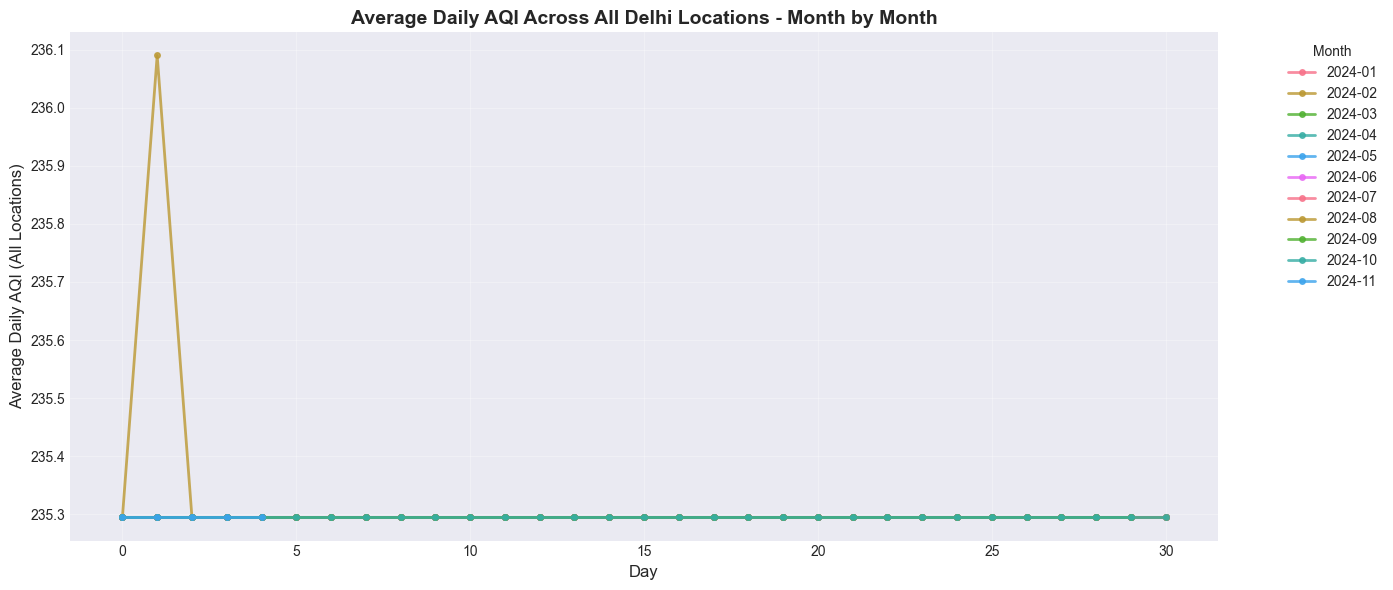


Monthly AQI Statistics:
2024-01: Mean=235.3, Max=561, Min=159, Std=93.8
2024-02: Mean=235.3, Max=561, Min=159, Std=93.8
2024-03: Mean=235.3, Max=561, Min=159, Std=93.8
2024-04: Mean=235.3, Max=561, Min=159, Std=93.8
2024-05: Mean=235.3, Max=561, Min=159, Std=93.8
2024-06: Mean=235.3, Max=561, Min=159, Std=93.8
2024-07: Mean=235.3, Max=561, Min=159, Std=93.8
2024-08: Mean=235.3, Max=561, Min=159, Std=93.8
2024-09: Mean=235.3, Max=561, Min=159, Std=93.8
2024-10: Mean=235.3, Max=561, Min=159, Std=93.8
2024-11: Mean=235.3, Max=561, Min=159, Std=93.8


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
# aqi_df = pd.read_csv('aqi_data.csv')
aqi_df['event_timestamp'] = pd.to_datetime(aqi_df['event_timestamp'])
aqi_df['date'] = aqi_df['event_timestamp'].dt.date
aqi_df['month'] = aqi_df['event_timestamp'].dt.to_period('M')
aqi_df['aqi'] = pd.to_numeric(aqi_df['aqi'], errors='coerce')
aqi_df = aqi_df.dropna(subset=['aqi'])

# Calculate average daily AQI for all locations, grouped by month
monthly_daily_avg = aqi_df.groupby(['month', 'date'])['aqi'].mean().reset_index()
monthly_daily_avg['month'] = monthly_daily_avg['month'].astype(str)

# Plot
fig, ax = plt.subplots(figsize=(14, 6))

for month in sorted(monthly_daily_avg['month'].unique()):
    month_data = monthly_daily_avg[monthly_daily_avg['month'] == month]
    ax.plot(range(len(month_data)), month_data['aqi'], marker='o', 
            linewidth=2, markersize=4, label=month, alpha=0.8)

ax.set_xlabel('Day', fontsize=12)
ax.set_ylabel('Average Daily AQI (All Locations)', fontsize=12)
ax.set_title('Average Daily AQI Across All Delhi Locations - Month by Month', 
             fontsize=14, fontweight='bold')
ax.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('delhi_aqi_monthly.png', dpi=200, bbox_inches='tight')
plt.show()

# Print monthly statistics
print("\nMonthly AQI Statistics:")
print("="*60)
monthly_stats = aqi_df.groupby('month')['aqi'].agg(['mean', 'max', 'min', 'std'])
for month, row in monthly_stats.iterrows():
    print(f"{month}: Mean={row['mean']:.1f}, Max={row['max']:.0f}, Min={row['min']:.0f}, Std={row['std']:.1f}")

DATA DISTRIBUTION CHECK

Total records: 126,311
Date range: 2024-01-01 00:44:28.651396 to 2024-11-05 13:44:28.651396

Unique dates: 310
Unique months: 11

----------------------------------------------------------------------
RECORDS PER MONTH:
----------------------------------------------------------------------
            Count  Mean AQI  Min AQI  Max AQI
year_month                                   
2024-01     12648     235.3    159.0    561.0
2024-02     11833     235.3    159.0    561.0
2024-03     12648     235.3    159.0    561.0
2024-04     12240     235.3    159.0    561.0
2024-05     12648     235.3    159.0    561.0
2024-06     12240     235.3    159.0    561.0
2024-07     12648     235.3    159.0    561.0
2024-08     12648     235.3    159.0    561.0
2024-09     12240     235.3    159.0    561.0
2024-10     12648     235.3    159.0    561.0
2024-11      1870     235.3    159.0    561.0

----------------------------------------------------------------------
RECORDS PER DA

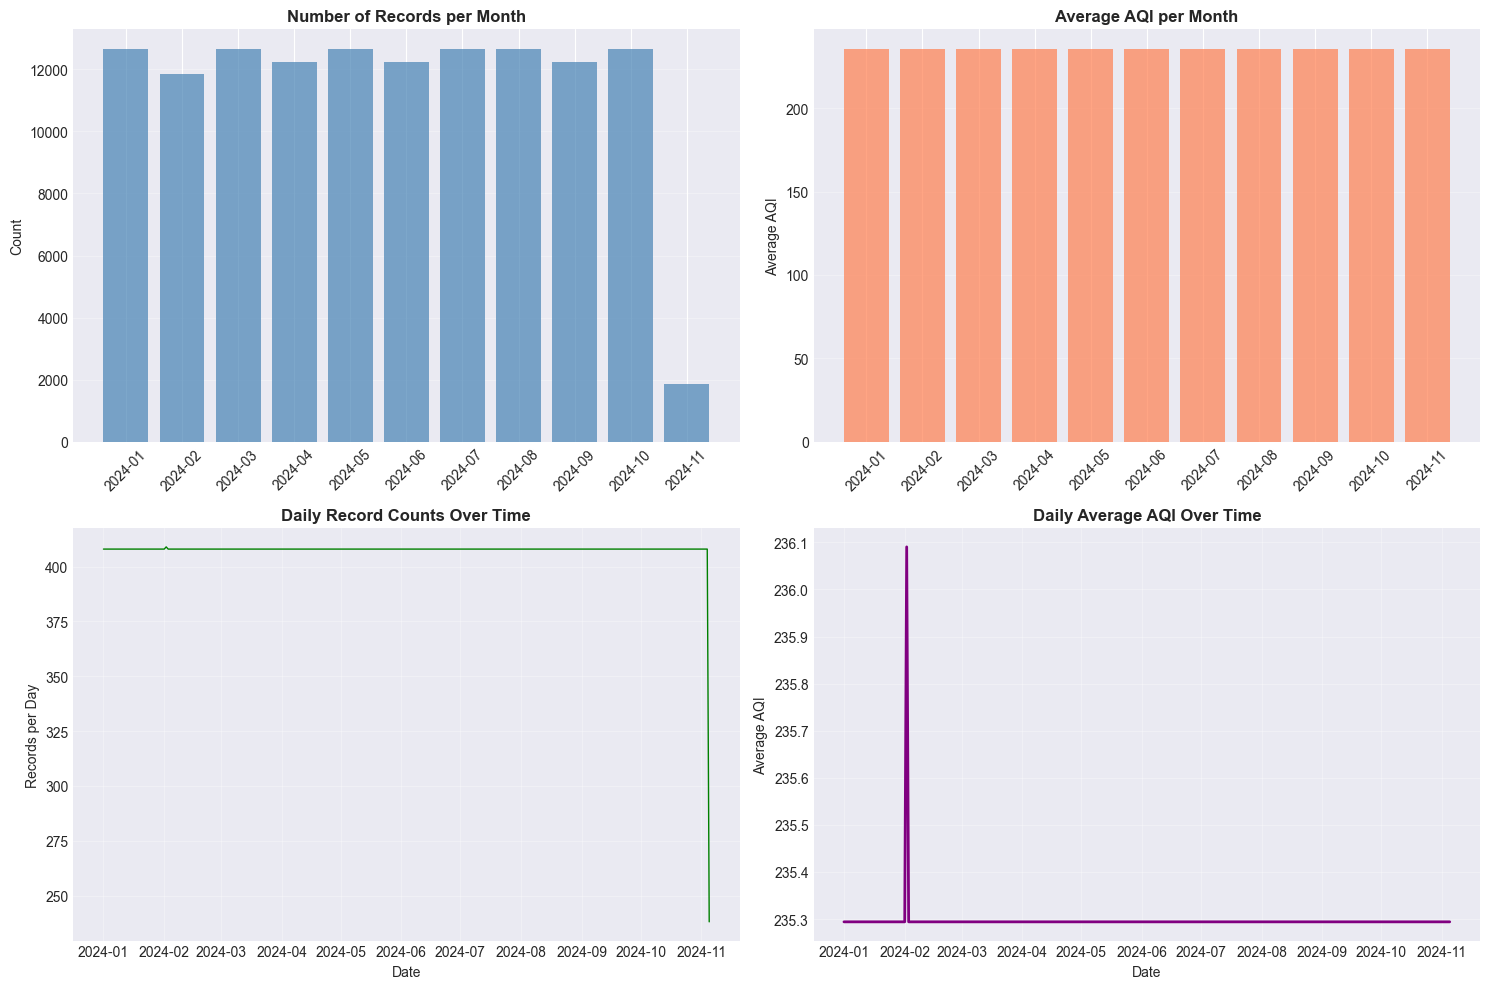


✅ Visualization saved as 'aqi_distribution_check.png'


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
# aqi_df = pd.read_csv('aqi_data.csv')
aqi_df['event_timestamp'] = pd.to_datetime(aqi_df['event_timestamp'])
aqi_df['aqi'] = pd.to_numeric(aqi_df['aqi'], errors='coerce')
aqi_df = aqi_df.dropna(subset=['aqi'])

# Extract date components
aqi_df['date'] = aqi_df['event_timestamp'].dt.date
aqi_df['month'] = aqi_df['event_timestamp'].dt.month
aqi_df['year'] = aqi_df['event_timestamp'].dt.year
aqi_df['year_month'] = aqi_df['event_timestamp'].dt.to_period('M')

# Check data distribution
print("="*70)
print("DATA DISTRIBUTION CHECK")
print("="*70)
print(f"\nTotal records: {len(aqi_df):,}")
print(f"Date range: {aqi_df['event_timestamp'].min()} to {aqi_df['event_timestamp'].max()}")
print(f"\nUnique dates: {aqi_df['date'].nunique()}")
print(f"Unique months: {aqi_df['year_month'].nunique()}")

print("\n" + "-"*70)
print("RECORDS PER MONTH:")
print("-"*70)
month_counts = aqi_df.groupby('year_month').agg({
    'aqi': ['count', 'mean', 'min', 'max']
}).round(1)
month_counts.columns = ['Count', 'Mean AQI', 'Min AQI', 'Max AQI']
print(month_counts)

print("\n" + "-"*70)
print("RECORDS PER DATE (First 20 and Last 20):")
print("-"*70)
date_counts = aqi_df.groupby('date').size().reset_index(name='count')
print("\nFirst 20 dates:")
print(date_counts.head(20))
print("\nLast 20 dates:")
print(date_counts.tail(20))

# Visualize distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Records per month
ax1 = axes[0, 0]
month_counts_simple = aqi_df.groupby('year_month').size()
ax1.bar(range(len(month_counts_simple)), month_counts_simple.values, color='steelblue', alpha=0.7)
ax1.set_xticks(range(len(month_counts_simple)))
ax1.set_xticklabels(month_counts_simple.index.astype(str), rotation=45)
ax1.set_title('Number of Records per Month', fontsize=12, fontweight='bold')
ax1.set_ylabel('Count')
ax1.grid(True, alpha=0.3, axis='y')

# 2. Average AQI per month
ax2 = axes[0, 1]
monthly_avg = aqi_df.groupby('year_month')['aqi'].mean()
ax2.bar(range(len(monthly_avg)), monthly_avg.values, color='coral', alpha=0.7)
ax2.set_xticks(range(len(monthly_avg)))
ax2.set_xticklabels(monthly_avg.index.astype(str), rotation=45)
ax2.set_title('Average AQI per Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average AQI')
ax2.grid(True, alpha=0.3, axis='y')

# 3. Daily records over time
ax3 = axes[1, 0]
daily_counts = aqi_df.groupby('date').size().reset_index(name='count')
daily_counts['date'] = pd.to_datetime(daily_counts['date'])
ax3.plot(daily_counts['date'], daily_counts['count'], linewidth=1, color='green')
ax3.set_title('Daily Record Counts Over Time', fontsize=12, fontweight='bold')
ax3.set_xlabel('Date')
ax3.set_ylabel('Records per Day')
ax3.grid(True, alpha=0.3)

# 4. AQI time series (daily average)
ax4 = axes[1, 1]
daily_aqi = aqi_df.groupby('date')['aqi'].mean().reset_index()
daily_aqi['date'] = pd.to_datetime(daily_aqi['date'])
ax4.plot(daily_aqi['date'], daily_aqi['aqi'], linewidth=2, color='purple')
ax4.set_title('Daily Average AQI Over Time', fontsize=12, fontweight='bold')
ax4.set_xlabel('Date')
ax4.set_ylabel('Average AQI')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('aqi_distribution_check.png', dpi=200, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("✅ Visualization saved as 'aqi_distribution_check.png'")
print("="*70)

Found 17 regions and 11 months
Regions: ['Anand Vihar', 'Burari', 'Jahangirpuri', 'Jawaharlal Nehru Stadium', 'Jhilmil', 'Lodhi Road', 'Major Dhyan Chand National Stadium', 'Mandir Marg', 'Mathura Road', 'North Campus', 'Parparganj', 'Pusa', 'R.K. Puram', 'Siri Fort', 'Sonia Vihar', 'Sriniwaspuri', 'Wazirpur']
Months: ['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10', '2024-11']



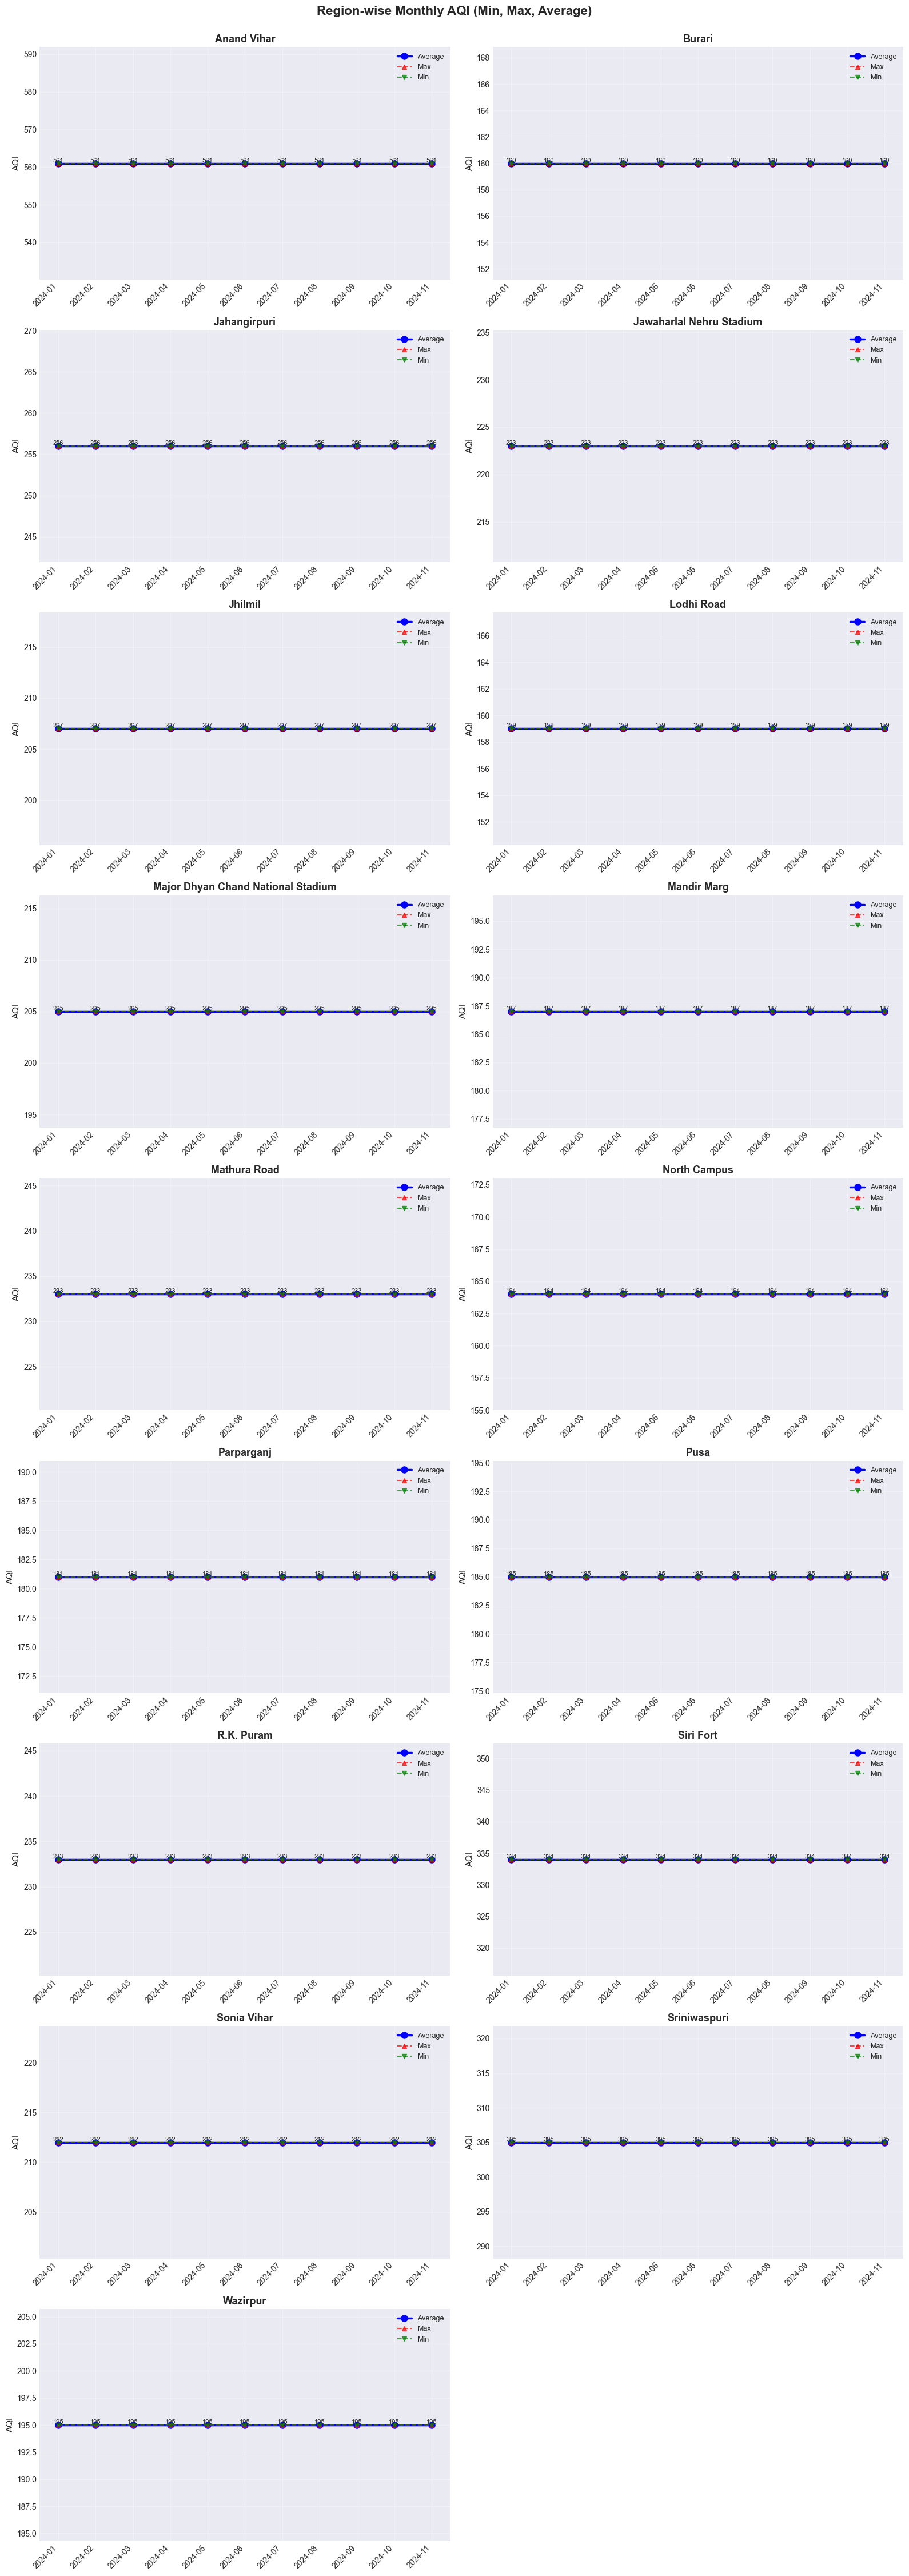


REGION-WISE MONTHLY AQI SUMMARY

Anand Vihar:
--------------------------------------------------------------------------------
  2024-01: Avg=561.0, Min=561, Max=561
  2024-02: Avg=561.0, Min=561, Max=561
  2024-03: Avg=561.0, Min=561, Max=561
  2024-04: Avg=561.0, Min=561, Max=561
  2024-05: Avg=561.0, Min=561, Max=561
  2024-06: Avg=561.0, Min=561, Max=561
  2024-07: Avg=561.0, Min=561, Max=561
  2024-08: Avg=561.0, Min=561, Max=561
  2024-09: Avg=561.0, Min=561, Max=561
  2024-10: Avg=561.0, Min=561, Max=561
  2024-11: Avg=561.0, Min=561, Max=561

Burari:
--------------------------------------------------------------------------------
  2024-01: Avg=160.0, Min=160, Max=160
  2024-02: Avg=160.0, Min=160, Max=160
  2024-03: Avg=160.0, Min=160, Max=160
  2024-04: Avg=160.0, Min=160, Max=160
  2024-05: Avg=160.0, Min=160, Max=160
  2024-06: Avg=160.0, Min=160, Max=160
  2024-07: Avg=160.0, Min=160, Max=160
  2024-08: Avg=160.0, Min=160, Max=160
  2024-09: Avg=160.0, Min=160, Max=160
  

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and clean data
# aqi_df = pd.read_csv('aqi_data.csv')
aqi_df['event_timestamp'] = pd.to_datetime(aqi_df['event_timestamp'])
aqi_df['aqi'] = pd.to_numeric(aqi_df['aqi'], errors='coerce')
aqi_df = aqi_df.dropna(subset=['aqi'])

# Extract month and region
aqi_df['year_month'] = aqi_df['event_timestamp'].dt.to_period('M').astype(str)
aqi_df['region'] = aqi_df['city']  # Use 'city' column as region

# Calculate monthly stats per region
monthly_region = aqi_df.groupby(['region', 'year_month'])['aqi'].agg(['mean', 'min', 'max']).reset_index()

# Get unique regions and months
regions = sorted(monthly_region['region'].unique())
months = sorted(monthly_region['year_month'].unique())

print(f"Found {len(regions)} regions and {len(months)} months")
print(f"Regions: {regions}")
print(f"Months: {months}\n")

# Create subplots for each region
n_regions = len(regions)
n_cols = 2
n_rows = (n_regions + 1) // 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
axes = axes.flatten() if n_regions > 1 else [axes]

for idx, region in enumerate(regions):
    ax = axes[idx]
    
    # Filter data for this region
    region_data = monthly_region[monthly_region['region'] == region].copy()
    region_data = region_data.sort_values('year_month')
    
    x = np.arange(len(region_data))
    
    # Plot mean, min, max
    ax.plot(x, region_data['mean'], 'o-', linewidth=2.5, markersize=8, 
            label='Average', color='blue')
    ax.plot(x, region_data['max'], '^--', linewidth=1.5, markersize=6, 
            label='Max', color='red', alpha=0.7)
    ax.plot(x, region_data['min'], 'v--', linewidth=1.5, markersize=6, 
            label='Min', color='green', alpha=0.7)
    
    # Fill between min and max
    ax.fill_between(x, region_data['min'], region_data['max'], alpha=0.2, color='gray')
    
    # Formatting
    ax.set_xticks(x)
    ax.set_xticklabels(region_data['year_month'], rotation=45, ha='right')
    ax.set_ylabel('AQI', fontsize=11)
    ax.set_title(f'{region}', fontsize=13, fontweight='bold')
    ax.legend(loc='best', fontsize=9)
    ax.grid(True, alpha=0.3)
    
    # Add value labels on mean line
    for i, (xi, yi) in enumerate(zip(x, region_data['mean'])):
        ax.text(xi, yi, f'{yi:.0f}', fontsize=8, ha='center', va='bottom')

# Remove extra subplots if any
for idx in range(n_regions, len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Region-wise Monthly AQI (Min, Max, Average)', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('region_wise_monthly_aqi.png', dpi=200, bbox_inches='tight')
plt.show()

# Print summary table
print("\n" + "="*80)
print("REGION-WISE MONTHLY AQI SUMMARY")
print("="*80)
for region in regions:
    print(f"\n{region}:")
    print("-"*80)
    region_data = monthly_region[monthly_region['region'] == region].sort_values('year_month')
    for _, row in region_data.iterrows():
        print(f"  {row['year_month']}: Avg={row['mean']:.1f}, Min={row['min']:.0f}, Max={row['max']:.0f}")
print("="*80)

Found 17 regions
Date range: 2024-01-01 00:00:00 to 2024-11-05 00:00:00
Regions: ['Anand Vihar', 'Burari', 'Jahangirpuri', 'Jawaharlal Nehru Stadium', 'Jhilmil', 'Lodhi Road', 'Major Dhyan Chand National Stadium', 'Mandir Marg', 'Mathura Road', 'North Campus', 'Parparganj', 'Pusa', 'R.K. Puram', 'Siri Fort', 'Sonia Vihar', 'Sriniwaspuri', 'Wazirpur']



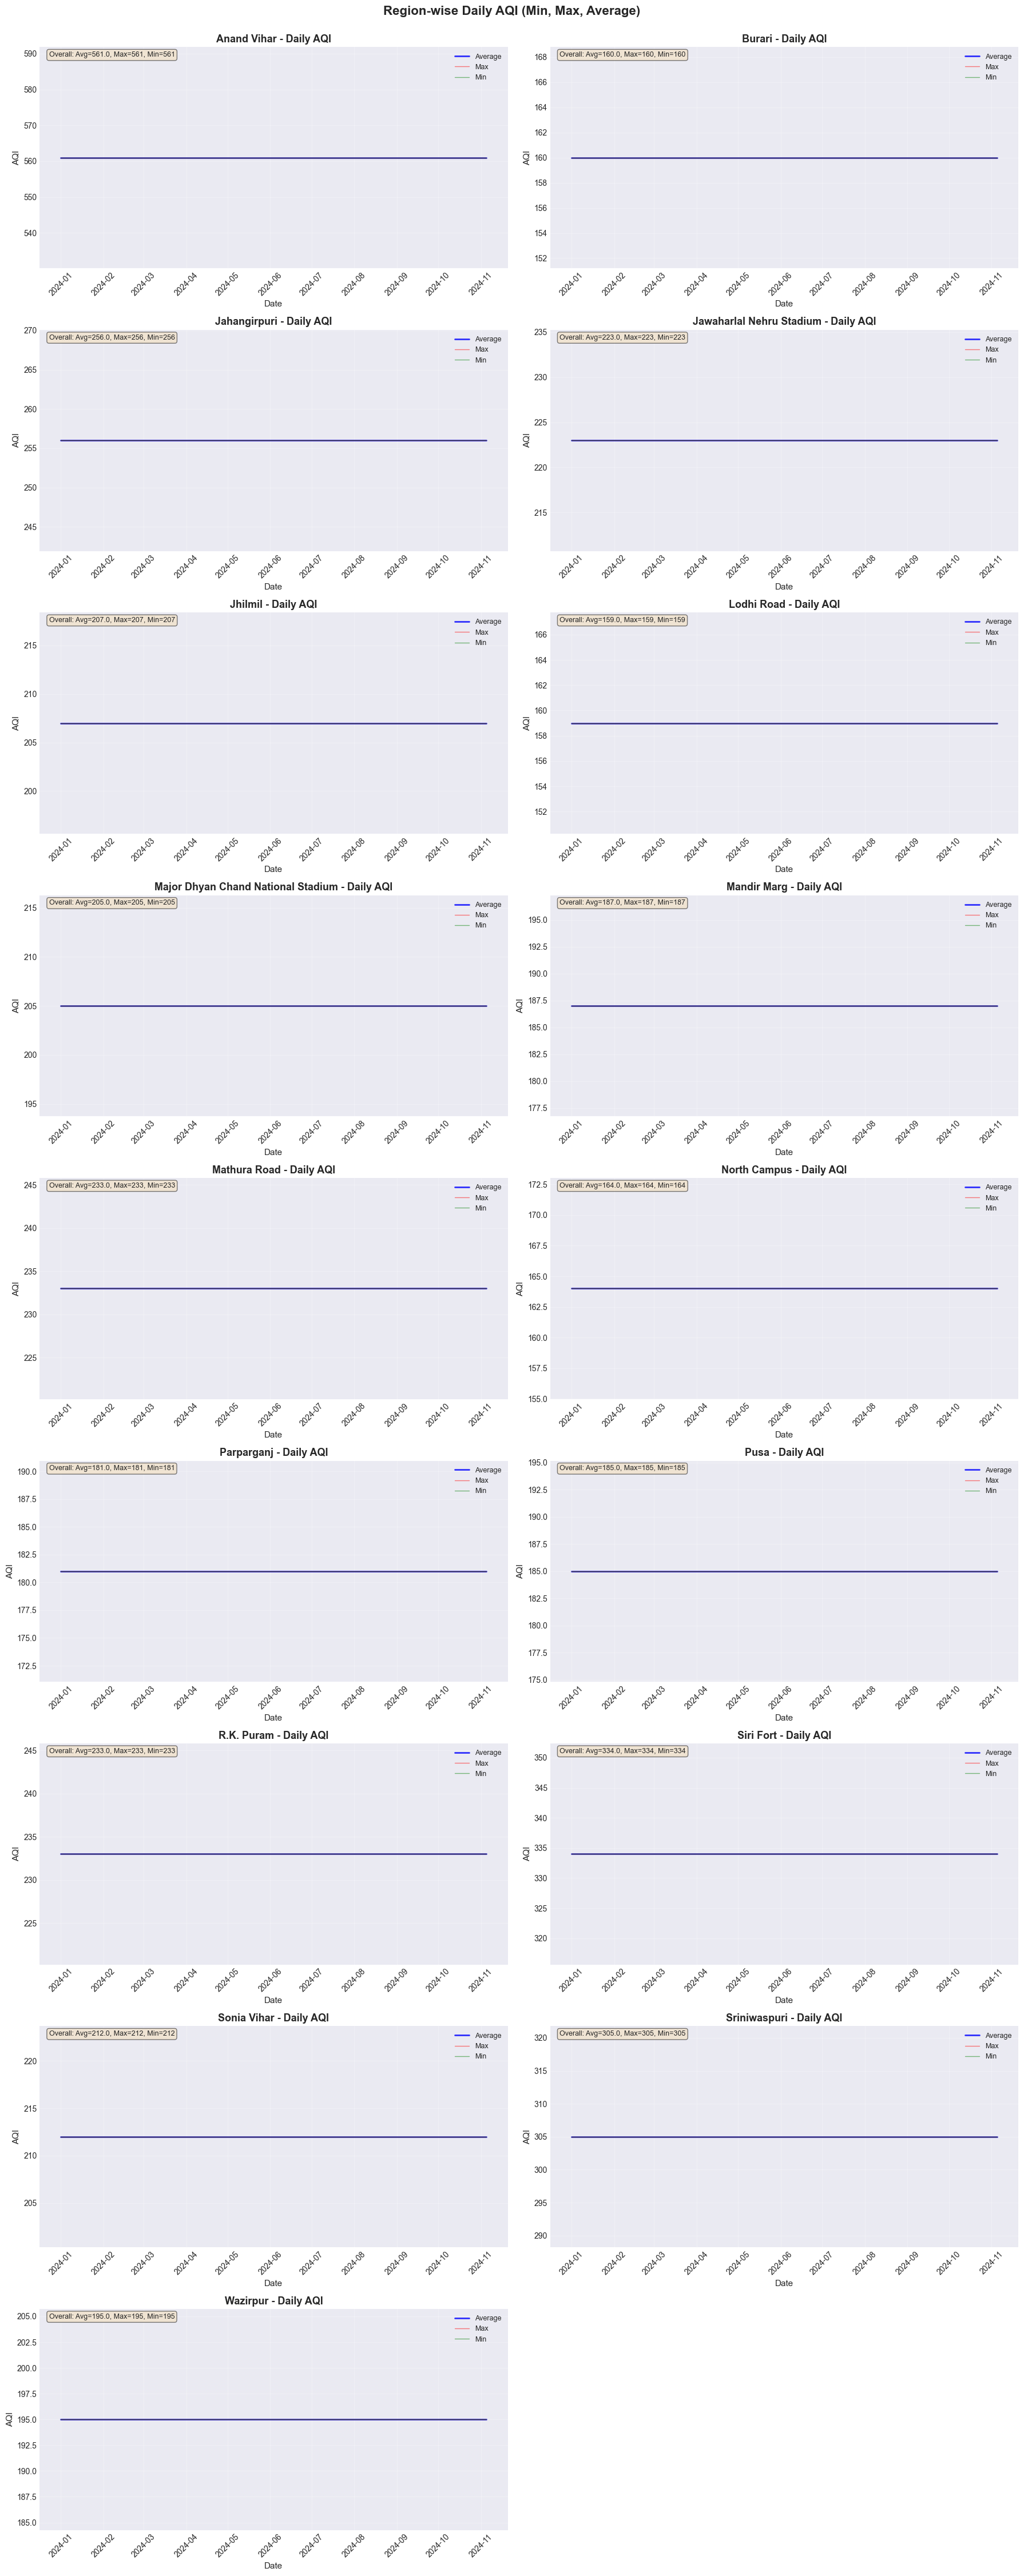


REGION-WISE DAILY AQI SUMMARY

Anand Vihar:
  Total days: 310
  Average AQI: 561.0
  Overall Max: 561 on 2024-01-01
  Overall Min: 561 on 2024-01-01
  Std Dev: 0.0

Burari:
  Total days: 310
  Average AQI: 160.0
  Overall Max: 160 on 2024-01-01
  Overall Min: 160 on 2024-01-01
  Std Dev: 0.0

Jahangirpuri:
  Total days: 310
  Average AQI: 256.0
  Overall Max: 256 on 2024-01-01
  Overall Min: 256 on 2024-01-01
  Std Dev: 0.0

Jawaharlal Nehru Stadium:
  Total days: 310
  Average AQI: 223.0
  Overall Max: 223 on 2024-01-01
  Overall Min: 223 on 2024-01-01
  Std Dev: 0.0

Jhilmil:
  Total days: 310
  Average AQI: 207.0
  Overall Max: 207 on 2024-01-01
  Overall Min: 207 on 2024-01-01
  Std Dev: 0.0

Lodhi Road:
  Total days: 310
  Average AQI: 159.0
  Overall Max: 159 on 2024-01-01
  Overall Min: 159 on 2024-01-01
  Std Dev: 0.0

Major Dhyan Chand National Stadium:
  Total days: 310
  Average AQI: 205.0
  Overall Max: 205 on 2024-01-01
  Overall Min: 205 on 2024-01-01
  Std Dev: 0.0

Man

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and clean data
# aqi_df = pd.read_csv('aqi_data.csv')
aqi_df['event_timestamp'] = pd.to_datetime(aqi_df['event_timestamp'])
aqi_df['aqi'] = pd.to_numeric(aqi_df['aqi'], errors='coerce')
aqi_df = aqi_df.dropna(subset=['aqi'])

# Extract date and region
aqi_df['date'] = aqi_df['event_timestamp'].dt.date
aqi_df['year_month'] = aqi_df['event_timestamp'].dt.to_period('M').astype(str)
aqi_df['region'] = aqi_df['city']

# Calculate daily stats per region
daily_region = aqi_df.groupby(['region', 'date'])['aqi'].agg(['mean', 'min', 'max']).reset_index()
daily_region['date'] = pd.to_datetime(daily_region['date'])

# Get unique regions
regions = sorted(daily_region['region'].unique())

print(f"Found {len(regions)} regions")
print(f"Date range: {daily_region['date'].min()} to {daily_region['date'].max()}")
print(f"Regions: {regions}\n")

# Create subplots for each region
n_regions = len(regions)
n_cols = 2
n_rows = (n_regions + 1) // 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten() if n_regions > 1 else [axes]

for idx, region in enumerate(regions):
    ax = axes[idx]
    
    # Filter data for this region
    region_data = daily_region[daily_region['region'] == region].copy()
    region_data = region_data.sort_values('date')
    
    # Plot mean, min, max
    ax.plot(region_data['date'], region_data['mean'], '-', linewidth=2, 
            label='Average', color='blue', alpha=0.8)
    ax.plot(region_data['date'], region_data['max'], '-', linewidth=1, 
            label='Max', color='red', alpha=0.5)
    ax.plot(region_data['date'], region_data['min'], '-', linewidth=1, 
            label='Min', color='green', alpha=0.5)
    
    # Fill between min and max
    ax.fill_between(region_data['date'], region_data['min'], region_data['max'], 
                     alpha=0.15, color='gray')
    
    # Formatting
    ax.set_xlabel('Date', fontsize=11)
    ax.set_ylabel('AQI', fontsize=11)
    ax.set_title(f'{region} - Daily AQI', fontsize=13, fontweight='bold')
    ax.legend(loc='best', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # Add stats text
    avg_aqi = region_data['mean'].mean()
    max_aqi = region_data['max'].max()
    min_aqi = region_data['min'].min()
    stats_text = f'Overall: Avg={avg_aqi:.1f}, Max={max_aqi:.0f}, Min={min_aqi:.0f}'
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
            fontsize=9, verticalalignment='top', 
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Remove extra subplots if any
for idx in range(n_regions, len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Region-wise Daily AQI (Min, Max, Average)', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('region_wise_daily_aqi.png', dpi=200, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("REGION-WISE DAILY AQI SUMMARY")
print("="*80)
for region in regions:
    region_data = daily_region[daily_region['region'] == region]
    print(f"\n{region}:")
    print(f"  Total days: {len(region_data)}")
    print(f"  Average AQI: {region_data['mean'].mean():.1f}")
    print(f"  Overall Max: {region_data['max'].max():.0f} on {region_data.loc[region_data['max'].idxmax(), 'date'].date()}")
    print(f"  Overall Min: {region_data['min'].min():.0f} on {region_data.loc[region_data['min'].idxmin(), 'date'].date()}")
    print(f"  Std Dev: {region_data['mean'].std():.1f}")
print("="*80)

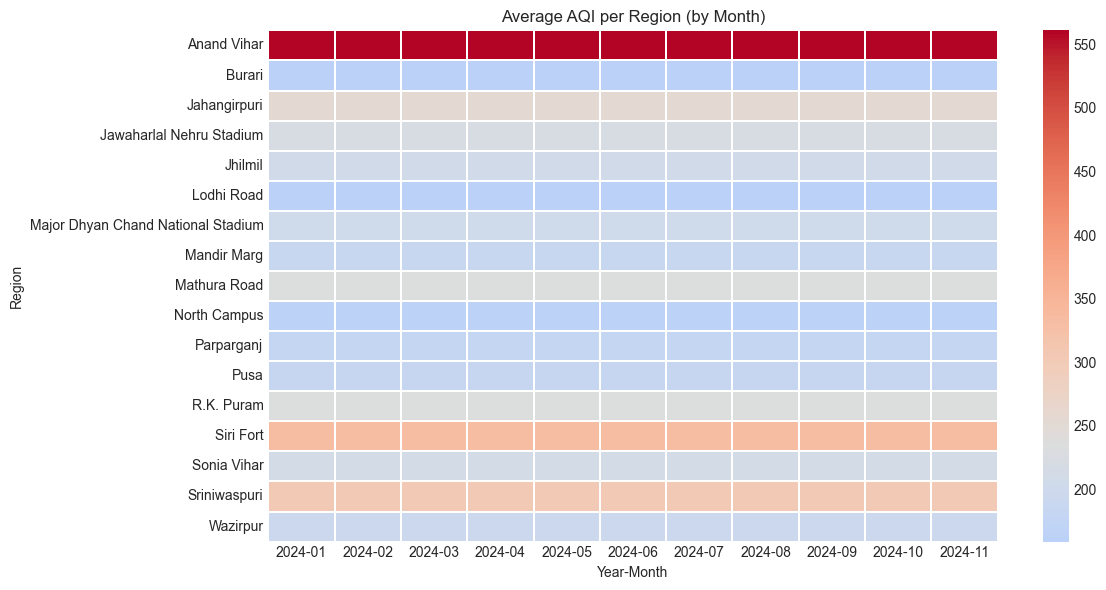

Top regions by number of spike months:
  (no spike months detected using threshold method)

Top overall months in Delhi by average AQI:
year_month        aqi
   2024-02 235.321643
   2024-01 235.294118
   2024-03 235.294118
   2024-04 235.294118
   2024-05 235.294118
   2024-06 235.294118
   2024-07 235.294118
   2024-08 235.294118
   2024-09 235.294118
   2024-10 235.294118
   2024-11 235.294118

(no region-month spikes to show)

(no region-day spikes to show)

Saved detailed CSVs to 'results/' and heatmap to 'results/region_monthly_aqi_heatmap.png'


In [18]:
# === AQI Spike Analysis per Region (fixed for empty-results) ===
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs('results', exist_ok=True)

# Use existing `aqi_df` from the notebook; fall back to columns if needed
df = aqi_df.copy()
region_col = 'city' if 'city' in df.columns else ('region' if 'region' in df.columns else 'location_id')

# Clean
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])
df['aqi'] = pd.to_numeric(df['aqi'], errors='coerce')
df = df.dropna(subset=['aqi', 'event_timestamp'])
df['date'] = df['event_timestamp'].dt.date
df['year_month'] = df['event_timestamp'].dt.to_period('M').astype(str)
df['region'] = df[region_col].astype(str)

# Daily regional mean
daily_region = df.groupby(['region', 'date'])['aqi'].mean().reset_index()

# Detect spikes as values > mean + k * std for each region
k = 2

# --- Top spike DAYS per region ---
top_day_spikes = []
for region, group in daily_region.groupby('region'):
    mean = group['aqi'].mean()
    std = group['aqi'].std(ddof=0) if group['aqi'].std(ddof=0) > 0 else 0.0
    threshold = mean + k * std
    spikes = group[group['aqi'] > threshold].sort_values('aqi', ascending=False)
    for _, row in spikes.head(10).iterrows():
        top_day_spikes.append({
            'region': region,
            'date': row['date'],
            'aqi': row['aqi'],
            'threshold': threshold,
            'mean': mean,
            'std': std
        })

# Build DataFrame safely
if top_day_spikes:
    top_days_df = pd.DataFrame(top_day_spikes).sort_values(['region', 'aqi'], ascending=[True, False])
    top_days_df.to_csv('results/top_day_spikes_per_region.csv', index=False)
else:
    top_days_df = pd.DataFrame(columns=['region', 'date', 'aqi', 'threshold', 'mean', 'std'])

# --- Top spike MONTHS per region ---
monthly_region = df.groupby(['region', 'year_month'])['aqi'].mean().reset_index()

top_month_spikes = []
for region, group in monthly_region.groupby('region'):
    mean = group['aqi'].mean()
    std = group['aqi'].std(ddof=0) if group['aqi'].std(ddof=0) > 0 else 0.0
    threshold = mean + k * std
    spikes = group[group['aqi'] > threshold].sort_values('aqi', ascending=False)
    for _, row in spikes.head(6).iterrows():
        top_month_spikes.append({
            'region': region,
            'year_month': row['year_month'],
            'aqi': row['aqi'],
            'threshold': threshold,
            'mean': mean,
            'std': std
        })

if top_month_spikes:
    top_months_df = pd.DataFrame(top_month_spikes).sort_values(['region', 'aqi'], ascending=[True, False])
    top_months_df.to_csv('results/top_month_spikes_per_region.csv', index=False)
else:
    top_months_df = pd.DataFrame(columns=['region', 'year_month', 'aqi', 'threshold', 'mean', 'std'])

# --- Overall top months across Delhi ---
overall_top_months = df.groupby('year_month')['aqi'].mean().reset_index().sort_values('aqi', ascending=False)
overall_top_months.to_csv('results/overall_top_months.csv', index=False)

# --- Heatmap: regions x months ---
pivot = monthly_region.pivot(index='region', columns='year_month', values='aqi')
plt.figure(figsize=(12, max(6, 0.25 * pivot.shape[0])))
sns.heatmap(pivot.fillna(0), cmap='coolwarm', center=df['aqi'].mean(), linewidths=0.3)
plt.title('Average AQI per Region (by Month)')
plt.ylabel('Region')
plt.xlabel('Year-Month')
plt.tight_layout()
plt.savefig('results/region_monthly_aqi_heatmap.png', dpi=200)
plt.show()

# --- Summaries to print ---
spike_month_counts = top_months_df.groupby('region').size().sort_values(ascending=False).reset_index(name='spike_month_count')

print("Top regions by number of spike months:")
if not spike_month_counts.empty:
    print(spike_month_counts.head(10).to_string(index=False))
else:
    print("  (no spike months detected using threshold method)")

print("\nTop overall months in Delhi by average AQI:")
print(overall_top_months.head(12).to_string(index=False))

if not top_months_df.empty:
    print("\nSample top spike months per region (top 3):")
    for region in top_months_df['region'].unique()[:10]:
        rows = top_months_df[top_months_df['region'] == region].head(3)
        print(f"\n{region}:")
        for _, r in rows.iterrows():
            print(f"  {r['year_month']} → avg AQI {r['aqi']:.1f} (threshold {r['threshold']:.1f})")
else:
    print('\n(no region-month spikes to show)')

if not top_days_df.empty:
    print("\nSample top spike days per region (top 3):")
    for region in top_days_df['region'].unique()[:10]:
        rows = top_days_df[top_days_df['region'] == region].head(3)
        print(f"\n{region}:")
        for _, r in rows.iterrows():
            print(f"  {r['date']} → AQI {r['aqi']:.1f} (threshold {r['threshold']:.1f})")
else:
    print('\n(no region-day spikes to show)')

print("\nSaved detailed CSVs to 'results/' and heatmap to 'results/region_monthly_aqi_heatmap.png'")

In [19]:
# === Absolute Top Days / Months (no threshold) ===
# Compute top absolute days and months to surface concrete spike dates

daily_region = df.groupby(['region', 'date'])['aqi'].mean().reset_index()
monthly_region = df.groupby(['region', 'year_month'])['aqi'].mean().reset_index()

# Top overall days across Delhi
top_days_overall = daily_region.sort_values('aqi', ascending=False).head(20)
top_days_overall.to_csv('results/top_days_overall.csv', index=False)

# Top months overall already saved as 'results/overall_top_months.csv'

# Top 3 days per top regions (by average AQI)
region_means = df.groupby('region')['aqi'].mean().reset_index().sort_values('aqi', ascending=False)
top_regions = region_means['region'].head(6).tolist()

top_days_per_region = []
for region in top_regions:
    rows = daily_region[daily_region['region'] == region].sort_values('aqi', ascending=False).head(3)
    for _, r in rows.iterrows():
        top_days_per_region.append({'region': region, 'date': r['date'], 'aqi': r['aqi']})

pd.DataFrame(top_days_per_region).to_csv('results/top_days_per_top_regions.csv', index=False)

# Top 3 months per top regions
top_months_per_region = []
for region in top_regions:
    rows = monthly_region[monthly_region['region'] == region].sort_values('aqi', ascending=False).head(3)
    for _, r in rows.iterrows():
        top_months_per_region.append({'region': region, 'year_month': r['year_month'], 'aqi': r['aqi']})

pd.DataFrame(top_months_per_region).to_csv('results/top_months_per_top_regions.csv', index=False)

# Print concise summary
print('Top regions by mean AQI:')
print(region_means.head(6).to_string(index=False))

print('\nTop overall days in Delhi (top 10):')
print(top_days_overall.head(10).to_string(index=False))

print('\nTop days for top regions (top 3 each):')
print(pd.DataFrame(top_days_per_region).to_string(index=False))

print('\nTop months for top regions (top 3 each):')
print(pd.DataFrame(top_months_per_region).to_string(index=False))

Top regions by mean AQI:
      region   aqi
 Anand Vihar 561.0
   Siri Fort 334.0
Sriniwaspuri 305.0
Jahangirpuri 256.0
Mathura Road 233.0
  R.K. Puram 233.0

Top overall days in Delhi (top 10):
     region       date   aqi
Anand Vihar 2024-01-01 561.0
Anand Vihar 2024-01-14 561.0
Anand Vihar 2024-01-13 561.0
Anand Vihar 2024-01-12 561.0
Anand Vihar 2024-01-11 561.0
Anand Vihar 2024-01-10 561.0
Anand Vihar 2024-01-09 561.0
Anand Vihar 2024-01-08 561.0
Anand Vihar 2024-01-07 561.0
Anand Vihar 2024-01-06 561.0

Top days for top regions (top 3 each):
      region       date   aqi
 Anand Vihar 2024-01-01 561.0
 Anand Vihar 2024-01-02 561.0
 Anand Vihar 2024-01-03 561.0
   Siri Fort 2024-01-01 334.0
   Siri Fort 2024-01-02 334.0
   Siri Fort 2024-01-03 334.0
Sriniwaspuri 2024-01-01 305.0
Sriniwaspuri 2024-01-02 305.0
Sriniwaspuri 2024-01-03 305.0
Jahangirpuri 2024-01-01 256.0
Jahangirpuri 2024-01-02 256.0
Jahangirpuri 2024-01-03 256.0
Mathura Road 2024-01-01 233.0
Mathura Road 2024-01-02 23

Total regions: 17
Regions with zero std: 17
Regions with near-zero std (<=0.01): 17
Regions with zero monthly variance: 17

Example region(s) with zero std:
  Anand Vihar: unique AQI values -> [561.]
  Burari: unique AQI values -> [160.]
  Jahangirpuri: unique AQI values -> [256.]
  Jawaharlal Nehru Stadium: unique AQI values -> [223.]
  Jhilmil: unique AQI values -> [207.]


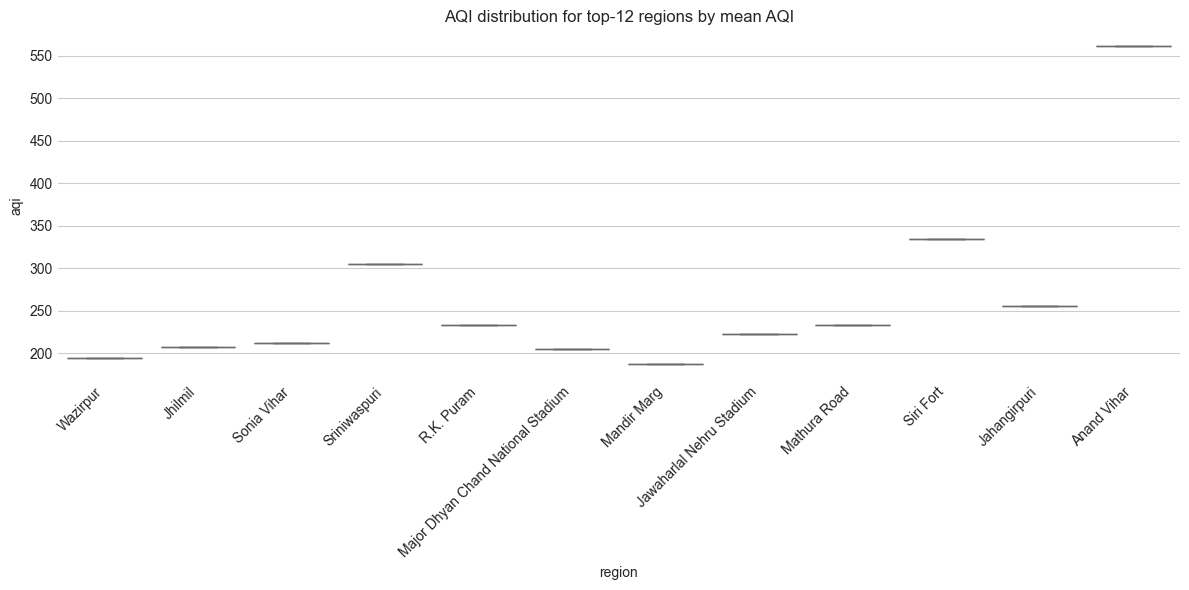

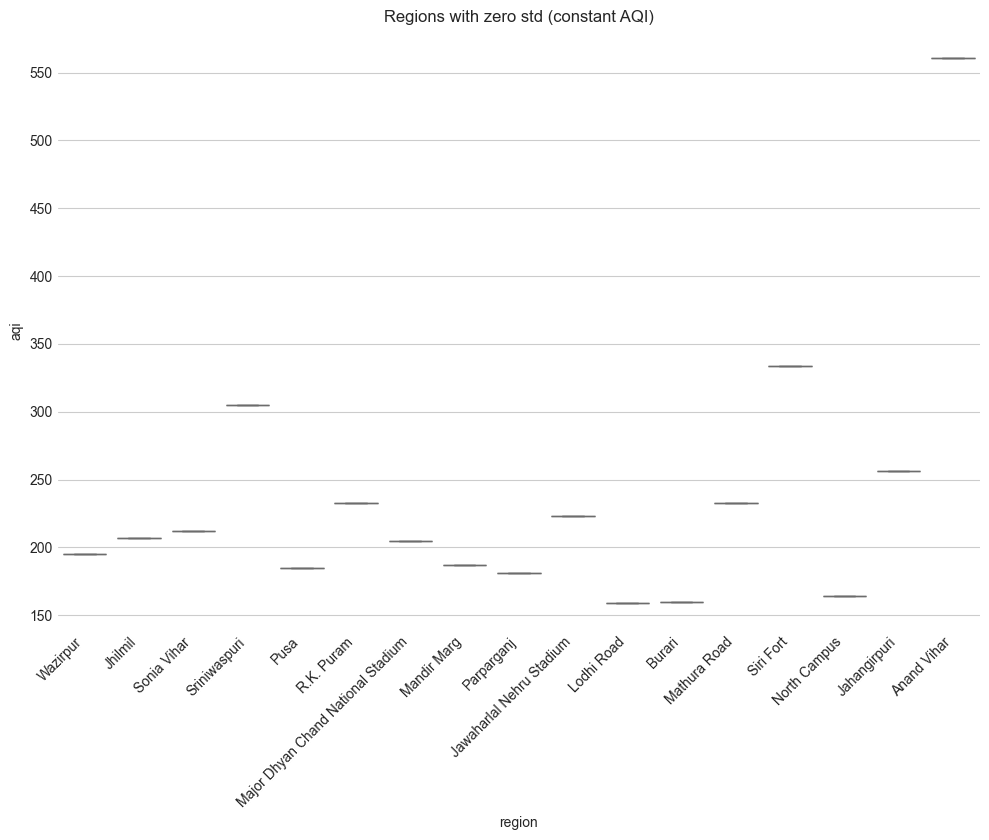


Saved stats and flagged regions to results/*.csv and boxplots to results/*.png


In [20]:
# === Per-region AQI variance check ===
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs('results', exist_ok=True)

# Use df from earlier (already cleaned in previous cells)
df = df.copy()  # should already exist; safe copy

# Ensure types
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])
df['aqi'] = pd.to_numeric(df['aqi'], errors='coerce')
df = df.dropna(subset=['aqi', 'event_timestamp'])
df['date'] = pd.to_datetime(df['event_timestamp']).dt.date

def compute_region_stats(df):
    r = df.groupby('region')['aqi'].agg(['count','mean','median','std','var','min','max']).reset_index()
    # robust stats
    q = df.groupby('region')['aqi'].quantile([0.25,0.75]).unstack(level=1)
    q.columns = ['q25','q75']
    r = r.merge(q, left_on='region', right_index=True)
    r['iqr'] = r['q75'] - r['q25']
    r['cv'] = r['std'] / r['mean']
    return r

region_stats = compute_region_stats(df)
region_stats.to_csv('results/region_aqi_stats.csv', index=False)

# Identify suspicious regions
# 1) zero std (constant per-sample)
zero_std = region_stats[region_stats['std'].fillna(0) == 0].copy()
# 2) near-zero std (tiny variation)
near_zero_std = region_stats[region_stats['std'].fillna(0) <= 0.01].copy()
# 3) zero monthly variance (monthly means constant)
monthly_region = df.groupby(['region', df['event_timestamp'].dt.to_period('M').astype(str)])['aqi'].mean().reset_index()
monthly_region.columns = ['region','year_month','aqi']
monthly_var = monthly_region.groupby('region')['aqi'].var().reset_index(name='monthly_var')
region_stats = region_stats.merge(monthly_var, on='region', how='left')
zero_monthly = region_stats[region_stats['monthly_var'].fillna(0) == 0].copy()

# Save suspicious lists
zero_std.to_csv('results/regions_zero_std.csv', index=False)
near_zero_std.to_csv('results/regions_near_zero_std.csv', index=False)
zero_monthly.to_csv('results/regions_zero_monthly_var.csv', index=False)

# Display samples for problematic regions
print('Total regions:', len(region_stats))
print('Regions with zero std:', len(zero_std))
print('Regions with near-zero std (<=0.01):', len(near_zero_std))
print('Regions with zero monthly variance:', len(zero_monthly))

if not zero_std.empty:
    print('\nExample region(s) with zero std:')
    for r in zero_std['region'].head(5).tolist():
        vals = df[df['region'] == r]['aqi'].unique()
        print(f"  {r}: unique AQI values -> {vals[:6]}")

# Plot: Boxplot for top regions by mean AQI (top 12) and show problematic ones
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))

top_regions = region_stats.sort_values('mean', ascending=False)['region'].head(12).tolist()
sns.boxplot(x='region', y='aqi', data=df[df['region'].isin(top_regions)])
plt.xticks(rotation=45, ha='right')
plt.title('AQI distribution for top-12 regions by mean AQI')
plt.tight_layout()
plt.savefig('results/boxplot_top12_regions.png', dpi=200)
plt.show()

# If any zero-std regions exist, plot their (constant) values
if not zero_std.empty:
    plt.figure(figsize=(10, max(2, 0.5*len(zero_std))))
    sns.boxplot(x='region', y='aqi', data=df[df['region'].isin(zero_std['region'].tolist())])
    plt.xticks(rotation=45, ha='right')
    plt.title('Regions with zero std (constant AQI)')
    plt.tight_layout()
    plt.savefig('results/boxplot_zero_std_regions.png', dpi=200)
    plt.show()

print('\nSaved stats and flagged regions to results/*.csv and boxplots to results/*.png')

In [21]:
# === Inspect raw source and reconstruct 2024 if needed ===
import os
import pandas as pd

raw_fp = 'data/delhi_air_quality_feature_store_unprocessed.csv'
f2024_fp = 'data/delhi_air_quality_2024.csv'
fixed_fp = 'data/delhi_air_quality_2024_fixed.csv'

print('Loading raw file:', raw_fp)
raw = pd.read_csv(raw_fp, low_memory=False)
print('RAW shape:', raw.shape)
print('Columns:', raw.columns.tolist())
print('\nSample rows:')
print(raw.head(5).to_string(index=False))

# Find AQI-like column
aq_cols = [c for c in raw.columns if 'aq' in c.lower()]
print('\nColumns matching "aq":', aq_cols)

if 'aqi' in raw.columns:
    raw['aqi'] = pd.to_numeric(raw['aqi'], errors='coerce')
else:
    print('\nWarning: no "aqi" column found in raw file — columns containing "aq":', aq_cols)

# Parse timestamps if present
if 'event_timestamp' in raw.columns:
    raw['event_timestamp'] = pd.to_datetime(raw['event_timestamp'], errors='coerce')
    print('\nEvent timestamp range:', raw['event_timestamp'].min(), 'to', raw['event_timestamp'].max())
else:
    print('\nNo event_timestamp column found in raw data')

# Determine region column
region_col = 'city' if 'city' in raw.columns else ('region' if 'region' in raw.columns else ('location_id' if 'location_id' in raw.columns else None))
print('\nRegion column chosen:', region_col)

if region_col and 'aqi' in raw.columns:
    # Per-region counts and unique AQI values
    r = raw.groupby(region_col)['aqi'].agg(['count','nunique','min','max','mean','std']).reset_index()
    r = r.sort_values('nunique')
    print('\nPer-region AQI nunique (sorted by nunique, asc):')
    print(r.to_string(index=False))
    const_regions = r[r['nunique']==1][region_col].tolist()
    print('\nRegions with single unique aqi:', len(const_regions))
    print(const_regions[:20])

    # Show sample raw rows for a few problematic regions
    for reg in const_regions[:6]:
        print(f"\nSample rows for region: {reg}")
        print(raw[raw[region_col]==reg].head(10).to_string(index=False))

# Compare to existing 2024 file
if os.path.exists(f2024_fp):
    print('\nLoading existing 2024 file to compare:', f2024_fp)
    f2024 = pd.read_csv(f2024_fp, low_memory=False)
    if 'event_timestamp' in f2024.columns:
        f2024['event_timestamp'] = pd.to_datetime(f2024['event_timestamp'], errors='coerce')
    if 'aqi' in f2024.columns:
        f2024['aqi'] = pd.to_numeric(f2024['aqi'], errors='coerce')
    print('2024 file shape:', f2024.shape)
    if region_col in f2024.columns and 'aqi' in f2024.columns:
        g2024 = f2024.groupby(region_col)['aqi'].agg(['count','nunique','min','max','mean','std']).reset_index()
        print('\nPer-region stats in existing 2024 file:')
        print(g2024.to_string(index=False))
else:
    print('\nNo existing 2024 file found at', f2024_fp)

# Recreate 2024 file from raw if raw has more variation than existing 2024
recreated = False
if region_col and 'aqi' in raw.columns and 'event_timestamp' in raw.columns:
    raw_2024 = raw[(raw['event_timestamp'] >= '2024-01-01') & (raw['event_timestamp'] < '2025-01-01')].copy()
    print('\nRaw 2024 shape:', raw_2024.shape)
    graw2024 = raw_2024.groupby(region_col)['aqi'].agg(['count','nunique','min','max','mean','std']).reset_index()
    print('\nPer-region stats in raw 2024:')
    print(graw2024.to_string(index=False))

    # If existing file present, compare number of constant regions
    need_fix = False
    if 'g2024' in locals():
        const_existing = (g2024['nunique']==1).sum()
        const_raw = (graw2024['nunique']==1).sum()
        print(f"\nConstant regions - existing 2024: {const_existing}, raw_2024: {const_raw}")
        if const_raw < const_existing:
            need_fix = True
    else:
        need_fix = True

    if need_fix:
        raw_2024.to_csv(fixed_fp, index=False)
        print('\nSaved reconstructed 2024 file to', fixed_fp)
        recreated = True

print('\nDIAGNOSIS:')
if 'r' in locals():
    print(f"Total regions: {len(r)}; regions with single unique AQI: {(r['nunique']==1).sum()}")
else:
    print('Could not compute per-region stats due to missing columns')

if recreated:
    print('A reconstructed 2024 CSV was created at', fixed_fp)
else:
    print('No reconstruction performed (raw and existing 2024 files look similar or missing necessary columns)')


Loading raw file: data/delhi_air_quality_feature_store_unprocessed.csv
RAW shape: (4468848, 15)
Columns: ['location_id', 'city', 'event_timestamp', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction', 'pm25', 'pm10', 'no2', 'so2', 'o3', 'co', 'aqi']

Sample rows:
                                                       location_id         city            event_timestamp  temperature  humidity  pressure  wind_speed  wind_direction  pm25  pm10  no2  so2   o3   co aqi
Delhi Institute of Tool Engineering, Wazirpur, Delhi, Delhi, India     Wazirpur 2000-03-15 13:44:28.651396       30.450    74.100   990.425       0.300            21.7 252.0 332.0 62.4  4.8 22.4 35.7 332
                            Satyawati College, Delhi, Delhi, India        Delhi 2000-03-15 13:44:28.651396       26.675    74.350   980.650       1.375            55.3 256.0 234.0 59.2 11.9  2.1 33.8 256
         ITI Shahdra, Jhilmil Industrial Area, Delhi, Delhi, India      Jhilmil 2000-03-15 13:44:28.651396

Loading source: data/delhi_air_quality_2024.csv


C:\Users\Atharva Taras\AppData\Local\Temp\ipykernel_27328\1572717392.py:53: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily['is_pct_spike'] = daily.groupby('region').apply(is_rel_spike).reset_index(level=0, drop=True)


Saved spike summary counts to results/spike_summary_counts.csv


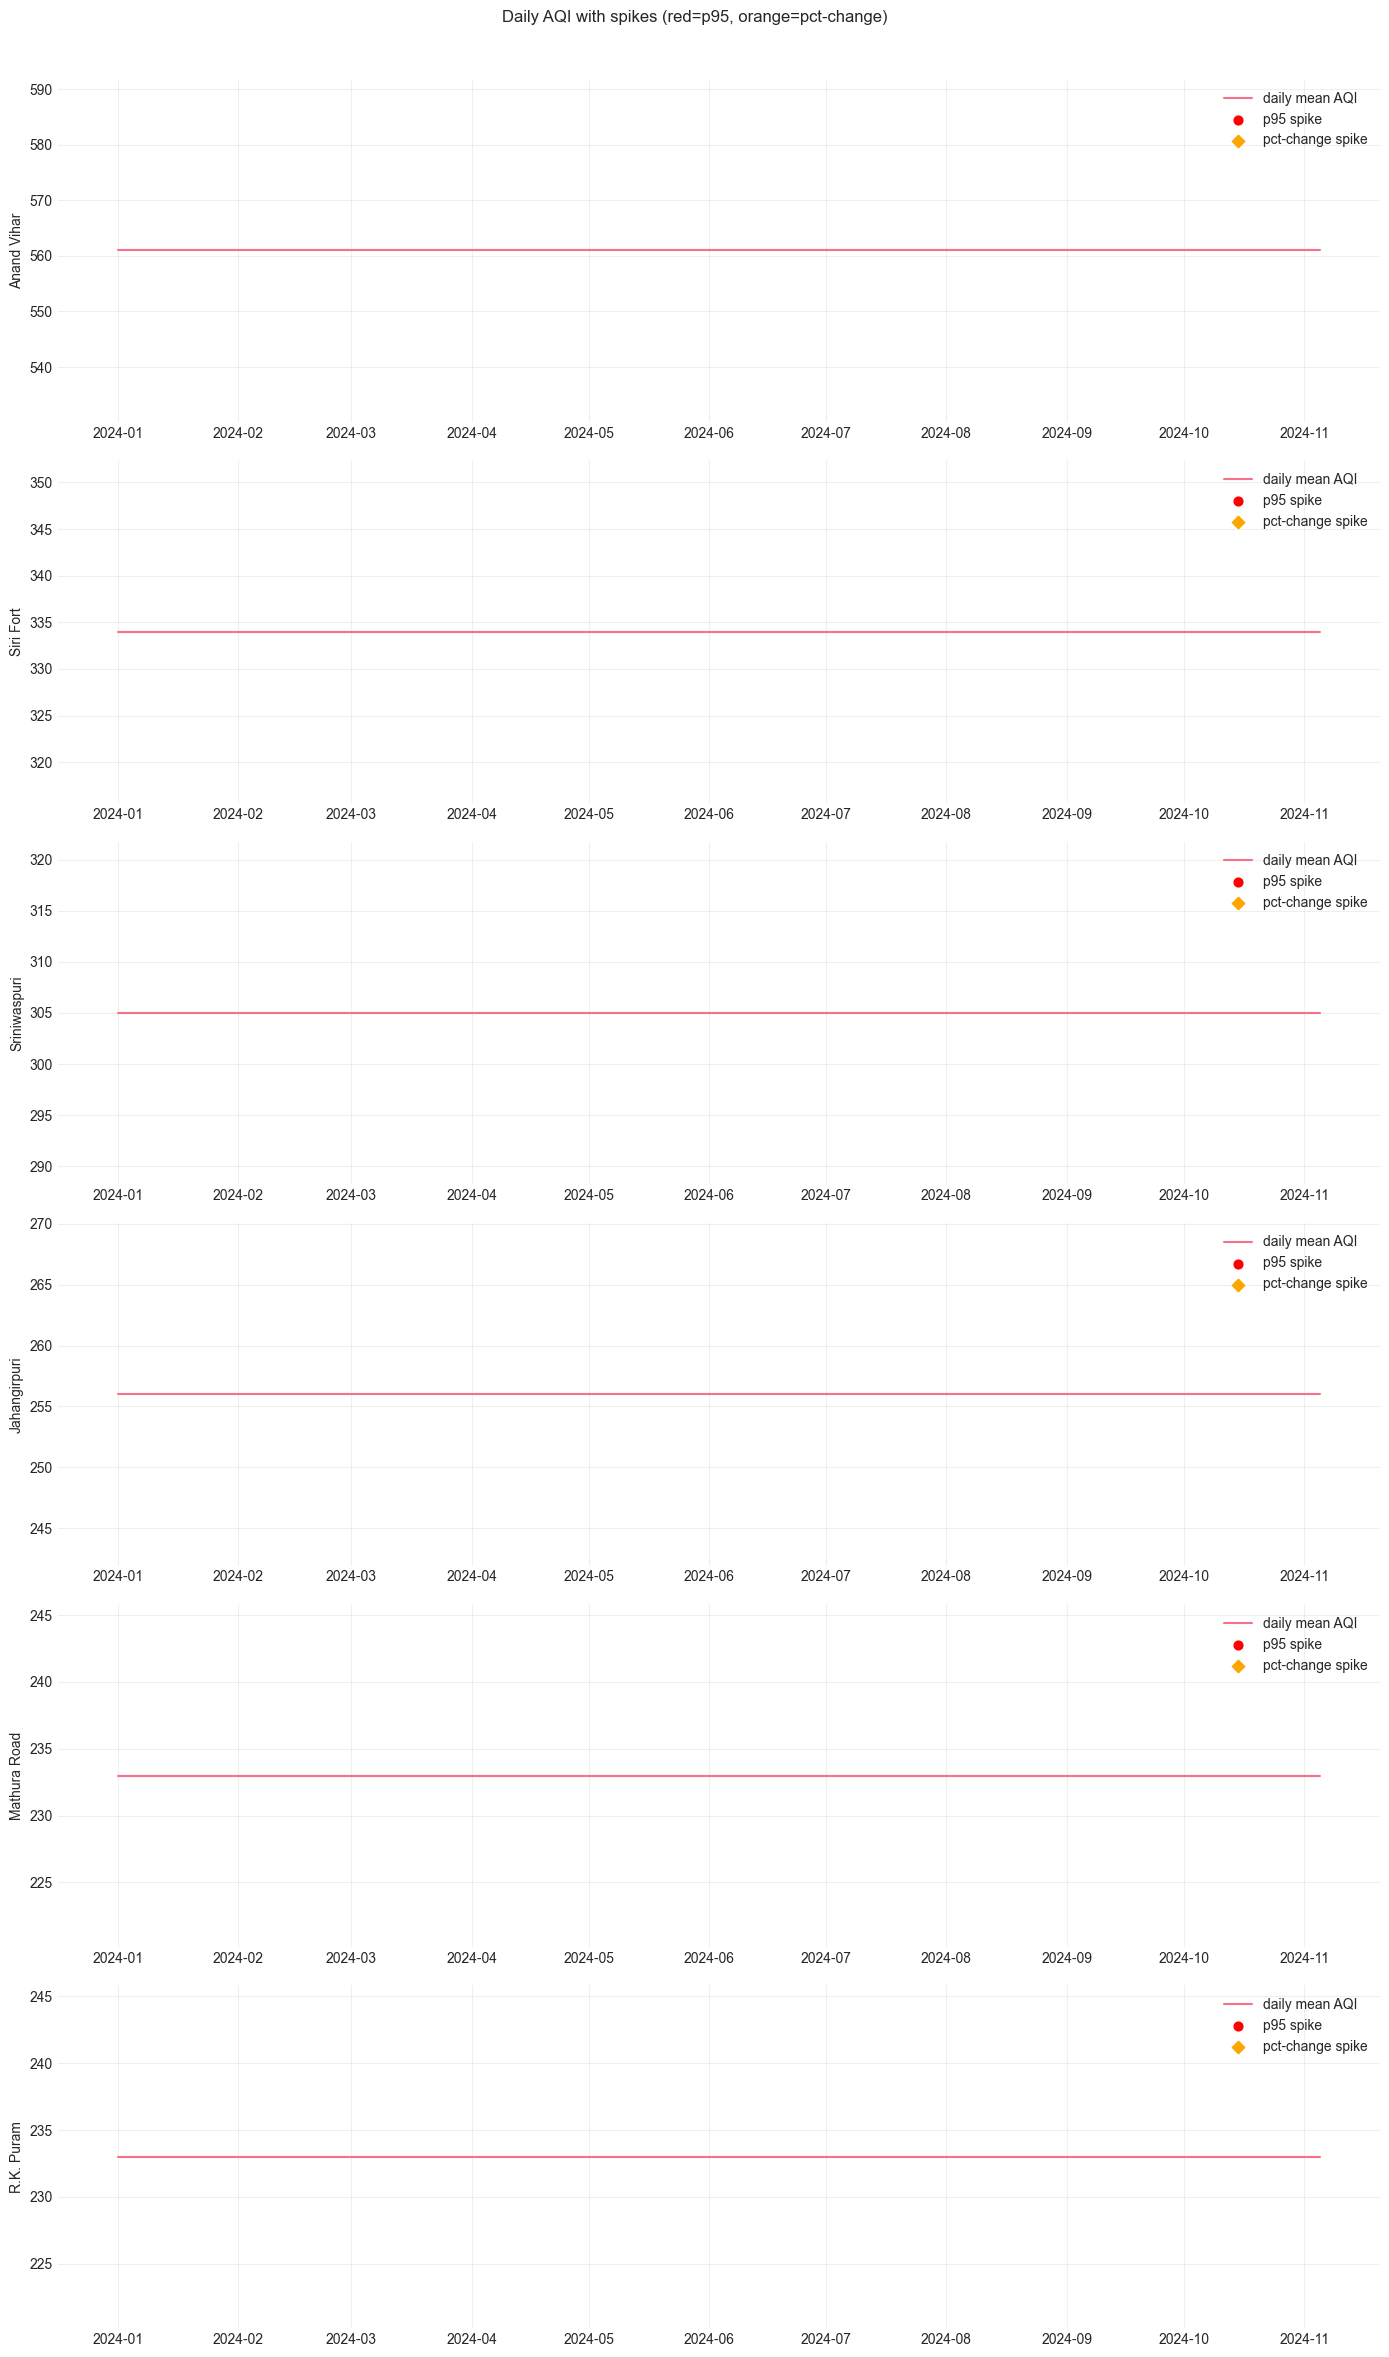


Top regions by p95 spike days:
                            region  total_days  p95_spike_days  pct_spike_days
                       Anand Vihar         310               0               0
                            Burari         310               0               0
                      Jahangirpuri         310               0               0
          Jawaharlal Nehru Stadium         310               0               0
                           Jhilmil         310               0               0
                        Lodhi Road         310               0               0
Major Dhyan Chand National Stadium         310               0               0
                       Mandir Marg         310               0               0
                      Mathura Road         310               0               0
                      North Campus         310               0               0

Top regions by pct-change spike days:
                            region  total_days  p95_spike_da

In [22]:
# === Percentile-based spikes & day-over-day changes (95th percentile + pct-change) ===
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs('results', exist_ok=True)

# Prefer fixed reconstructed file if available
fixed_fp = 'data/delhi_air_quality_2024_fixed.csv'
fallback_fp = 'data/delhi_air_quality_2024.csv'
source_fp = fixed_fp if os.path.exists(fixed_fp) else fallback_fp
print('Loading source:', source_fp)

df_src = pd.read_csv(source_fp, low_memory=False)
# Basic cleaning
df_src['event_timestamp'] = pd.to_datetime(df_src['event_timestamp'], errors='coerce')
df_src['aqi'] = pd.to_numeric(df_src['aqi'], errors='coerce')
# choose region column
region_col = 'city' if 'city' in df_src.columns else ('region' if 'region' in df_src.columns else ('location_id' if 'location_id' in df_src.columns else None))
if region_col is None:
    raise ValueError('No region column found')

df_src = df_src.dropna(subset=['event_timestamp','aqi'])
df_src['date'] = df_src['event_timestamp'].dt.date

# Daily mean AQI per region
daily = df_src.groupby([region_col,'date'])['aqi'].mean().reset_index().rename(columns={region_col:'region'})

# PERCENTILE METHOD: per-region 95th percentile
pct = 0.95
p95 = daily.groupby('region')['aqi'].quantile(pct).reset_index(name='p95')
daily = daily.merge(p95, on='region', how='left')
daily['is_p95_spike'] = daily['aqi'] > daily['p95']

# Save percentile spikes
p95_spikes = daily[daily['is_p95_spike']].sort_values(['region','aqi'], ascending=[True,False])
p95_spikes.to_csv('results/spikes_percentile_95_per_region.csv', index=False)

# DAY-OVER-DAY: compute pct_change per region
daily = daily.sort_values(['region','date'])
daily['aqi_pct_change'] = daily.groupby('region')['aqi'].pct_change()
# Define a relative spike: pct_change > 0.5 (50% increase) OR in top 1% of positive increases per region
def is_rel_spike(gr):
    pos = gr['aqi_pct_change'].dropna()
    if len(pos)==0:
        return pd.Series(False, index=gr.index)
    thr99 = pos[pos>0].quantile(0.99) if (pos>0).any() else 1.0
    combined_thr = max(0.5, thr99)  # at least 50% or more extreme
    return gr['aqi_pct_change'] > combined_thr

daily['is_pct_spike'] = daily.groupby('region').apply(is_rel_spike).reset_index(level=0, drop=True)

# Save pct-change spikes
pct_spikes = daily[daily['is_pct_spike']].sort_values(['region','aqi_pct_change'], ascending=[True,False])
pct_spikes.to_csv('results/spikes_pct_change_per_region.csv', index=False)

# Summary counts
summary = daily.groupby('region').agg(
    total_days=('date','count'),
    p95_spike_days=('is_p95_spike','sum'),
    pct_spike_days=('is_pct_spike','sum')
).reset_index()
summary = summary.sort_values(['p95_spike_days','pct_spike_days'], ascending=False)
summary.to_csv('results/spike_summary_counts.csv', index=False)
print('Saved spike summary counts to results/spike_summary_counts.csv')

# Plot: for top N regions by mean AQI, show daily series with markers for both spike types
sns.set_style('whitegrid')
N = 6
top_regions = df_src.groupby(region_col)['aqi'].mean().sort_values(ascending=False).head(N).index.tolist()
plt.figure(figsize=(14, 4*N))
for i, reg in enumerate(top_regions, 1):
    ax = plt.subplot(N,1,i)
    reg_daily = daily[daily['region']==reg].copy()
    reg_daily['date'] = pd.to_datetime(reg_daily['date'])
    ax.plot(reg_daily['date'], reg_daily['aqi'], label='daily mean AQI')
    ax.scatter(reg_daily.loc[reg_daily['is_p95_spike'],'date'], reg_daily.loc[reg_daily['is_p95_spike'],'aqi'], color='red', s=40, label='p95 spike')
    ax.scatter(reg_daily.loc[reg_daily['is_pct_spike'],'date'], reg_daily.loc[reg_daily['is_pct_spike'],'aqi'], color='orange', s=40, marker='D', label='pct-change spike')
    ax.set_ylabel(reg)
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)
plt.suptitle('Daily AQI with spikes (red=p95, orange=pct-change)')
plt.tight_layout(rect=[0,0,1,0.97])
plt.savefig('results/daily_spikes_top_regions.png', dpi=200)
plt.show()

# Print quick top spike regions
print('\nTop regions by p95 spike days:')
print(summary.sort_values('p95_spike_days', ascending=False).head(10).to_string(index=False))
print('\nTop regions by pct-change spike days:')
print(summary.sort_values('pct_spike_days', ascending=False).head(10).to_string(index=False))

print('\nSaved spike CSVs and plots in results/')

C:\Users\Atharva Taras\AppData\Local\Temp\ipykernel_27328\239214868.py:36: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily['is_pct_spike'] = daily.groupby('region').apply(is_rel_spike).reset_index(level=0, drop=True)


Saved recomputed spike CSVs to results/

Top regions by p95 spike days:
                            region  total_days  p95_spike_days  pct_spike_days
                       Anand Vihar         310               0               0
                            Burari         310               0               0
                      Jahangirpuri         310               0               0
          Jawaharlal Nehru Stadium         310               0               0
                           Jhilmil         310               0               0
                        Lodhi Road         310               0               0
Major Dhyan Chand National Stadium         310               0               0
                       Mandir Marg         310               0               0
                      Mathura Road         310               0               0
                      North Campus         310               0               0

Top regions by pct-change spike days:
                    

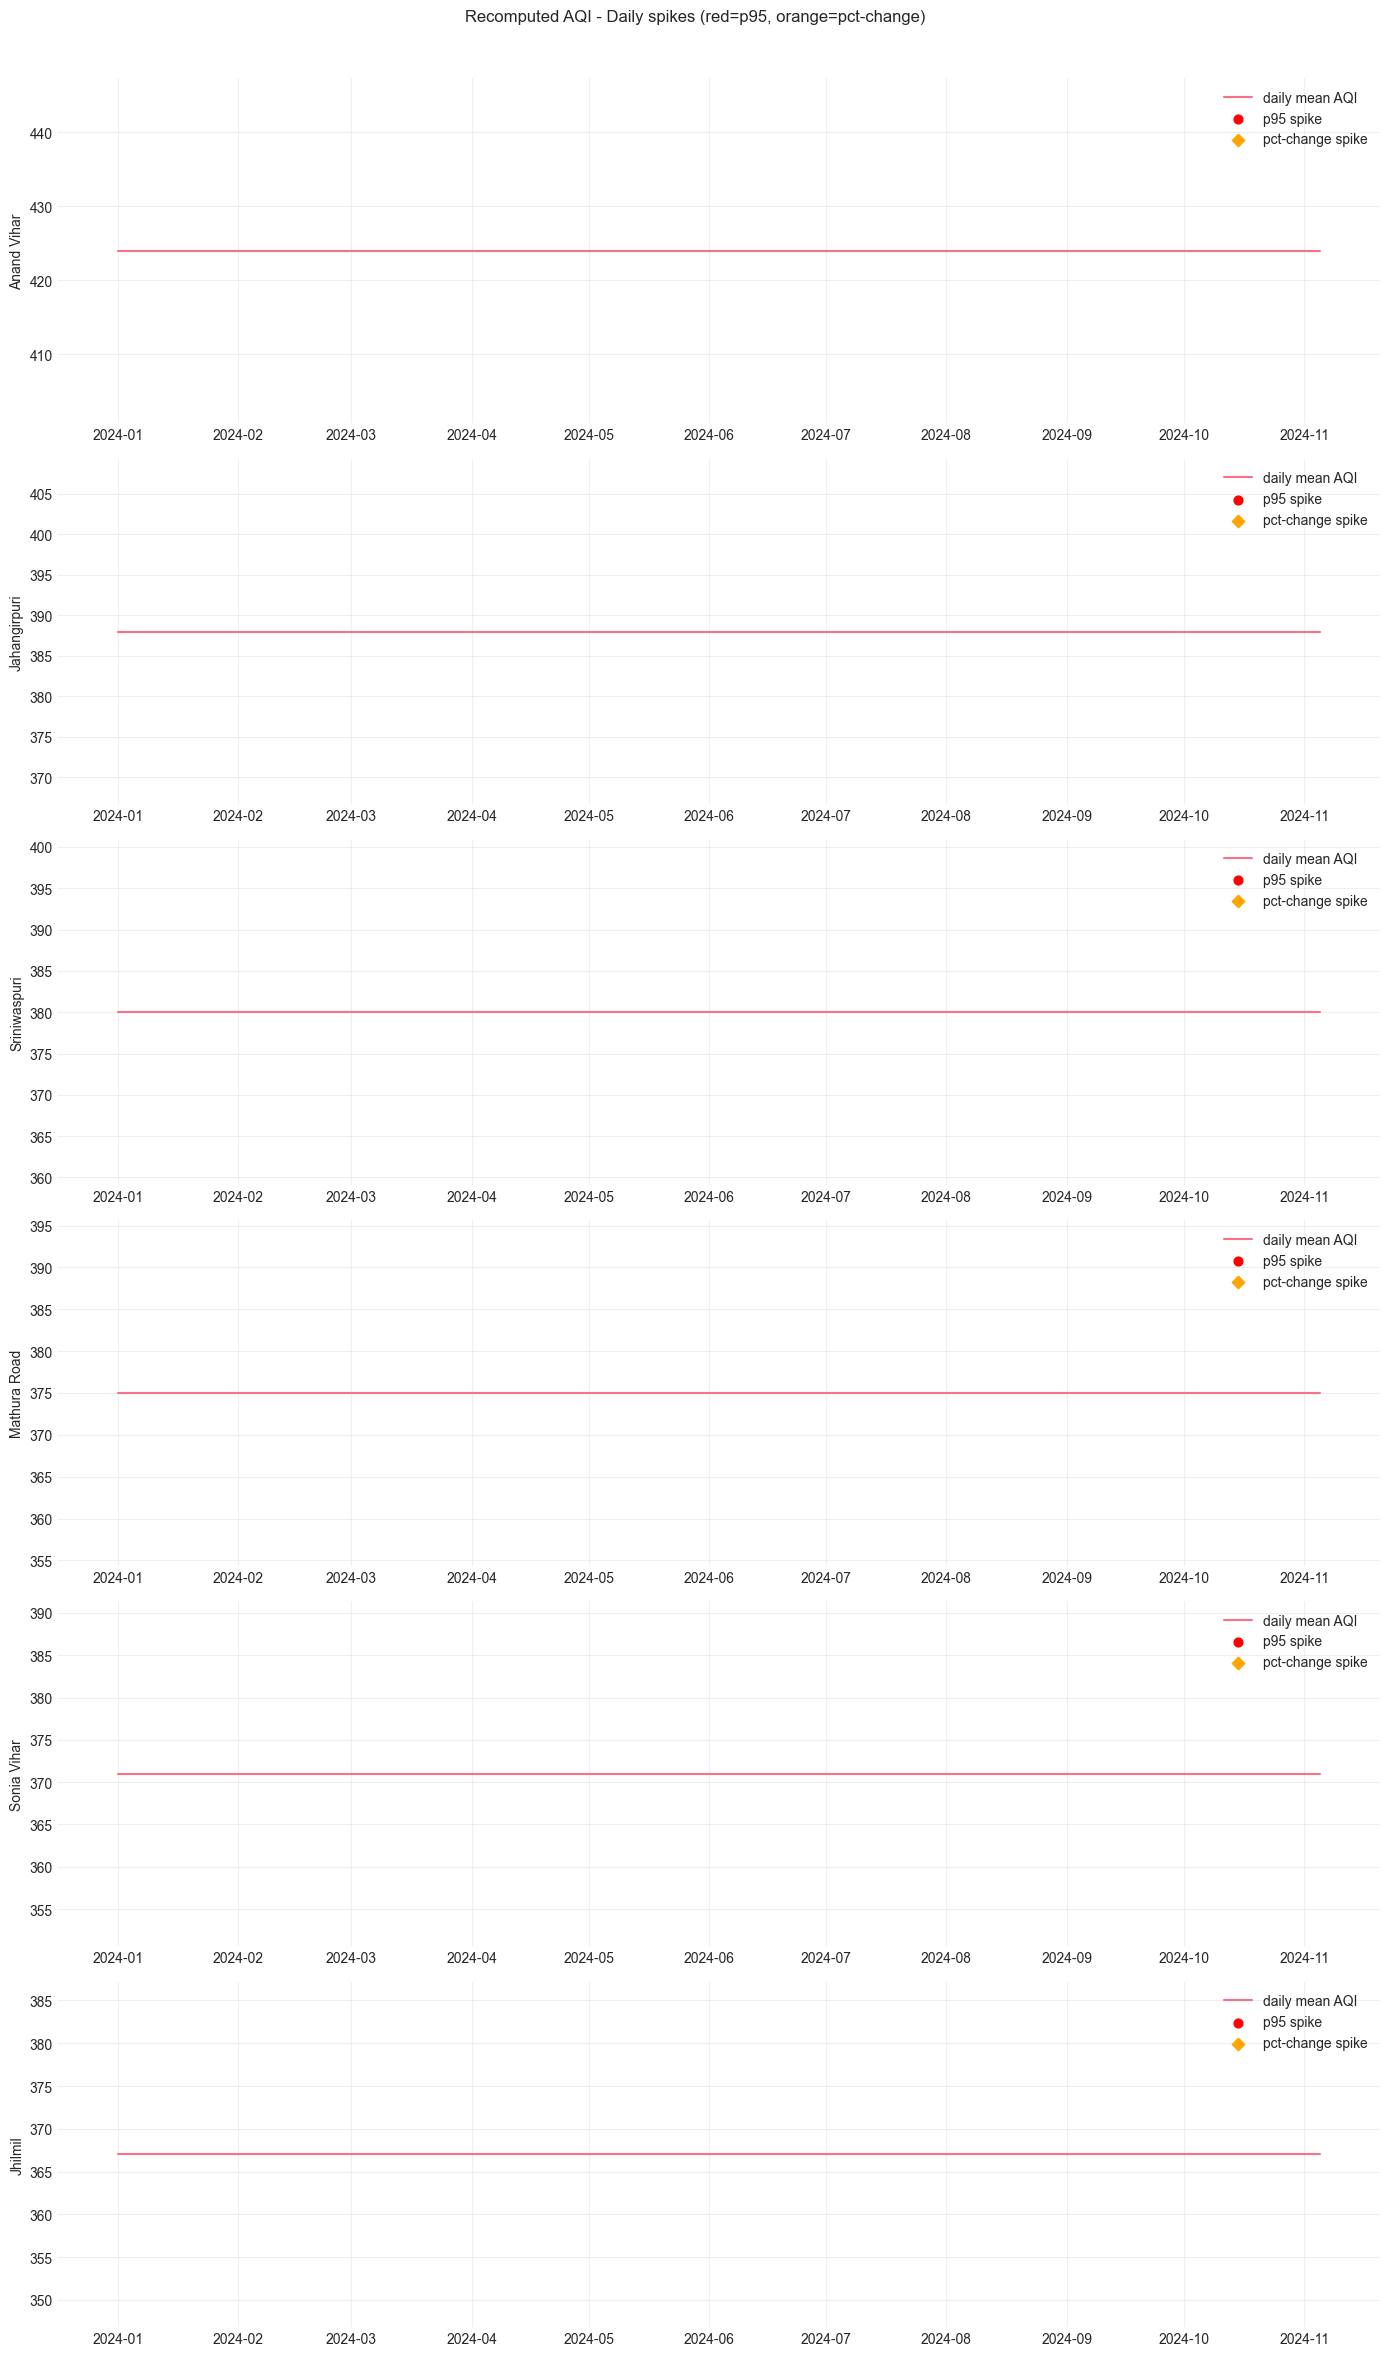

In [26]:
# === Re-run spike detection on recomputed AQI (95th pct + pct-change) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs('results', exist_ok=True)
fp = 'data/delhi_air_quality_2024_recomputed.csv'
df = pd.read_csv(fp, low_memory=False)
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], errors='coerce')
df = df.dropna(subset=['event_timestamp','aqi_recomputed'])
df['date'] = df['event_timestamp'].dt.date

# daily mean AQI per region
region_col = 'city' if 'city' in df.columns else 'location_id'
daily = df.groupby([region_col,'date'])['aqi_recomputed'].mean().reset_index().rename(columns={region_col:'region','aqi_recomputed':'aqi'})

# pct method
p95 = daily.groupby('region')['aqi'].quantile(0.95).reset_index(name='p95')
daily = daily.merge(p95, on='region', how='left')
daily['is_p95_spike'] = daily['aqi'] > daily['p95']

# pct-change
daily = daily.sort_values(['region','date'])
daily['aqi_pct_change'] = daily.groupby('region')['aqi'].pct_change()

def is_rel_spike(gr):
    pos = gr['aqi_pct_change'].dropna()
    if len(pos)==0:
        return pd.Series(False, index=gr.index)
    thr99 = pos[pos>0].quantile(0.99) if (pos>0).any() else 1.0
    combined_thr = max(0.5, thr99)
    return gr['aqi_pct_change'] > combined_thr

daily['is_pct_spike'] = daily.groupby('region').apply(is_rel_spike).reset_index(level=0, drop=True)

# save
daily[daily['is_p95_spike']].to_csv('results/recomputed_spikes_percentile_95_per_region.csv', index=False)
daily[daily['is_pct_spike']].to_csv('results/recomputed_spikes_pct_change_per_region.csv', index=False)
summary = daily.groupby('region').agg(total_days=('date','count'), p95_spike_days=('is_p95_spike','sum'), pct_spike_days=('is_pct_spike','sum')).reset_index()
summary.to_csv('results/recomputed_spike_summary_counts.csv', index=False)

print('Saved recomputed spike CSVs to results/')
print('\nTop regions by p95 spike days:')
print(summary.sort_values('p95_spike_days', ascending=False).head(10).to_string(index=False))
print('\nTop regions by pct-change spike days:')
print(summary.sort_values('pct_spike_days', ascending=False).head(10).to_string(index=False))

# plot for top regions
sns.set_style('whitegrid')
N = 6
top_regions = df.groupby(region_col)['aqi_recomputed'].mean().sort_values(ascending=False).head(N).index.tolist()
plt.figure(figsize=(14, 4*N))
for i, reg in enumerate(top_regions, 1):
    ax = plt.subplot(N,1,i)
    rd = daily[daily['region']==reg].copy()
    rd['date'] = pd.to_datetime(rd['date'])
    ax.plot(rd['date'], rd['aqi'], label='daily mean AQI')
    ax.scatter(rd.loc[rd['is_p95_spike'],'date'], rd.loc[rd['is_p95_spike'],'aqi'], color='red', s=40, label='p95 spike')
    ax.scatter(rd.loc[rd['is_pct_spike'],'date'], rd.loc[rd['is_pct_spike'],'aqi'], color='orange', s=40, marker='D', label='pct-change spike')
    ax.set_ylabel(reg)
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)
plt.suptitle('Recomputed AQI - Daily spikes (red=p95, orange=pct-change)')
plt.tight_layout(rect=[0,0,1,0.97])
plt.savefig('results/daily_spikes_recomputed_top_regions.png', dpi=200)
plt.show()

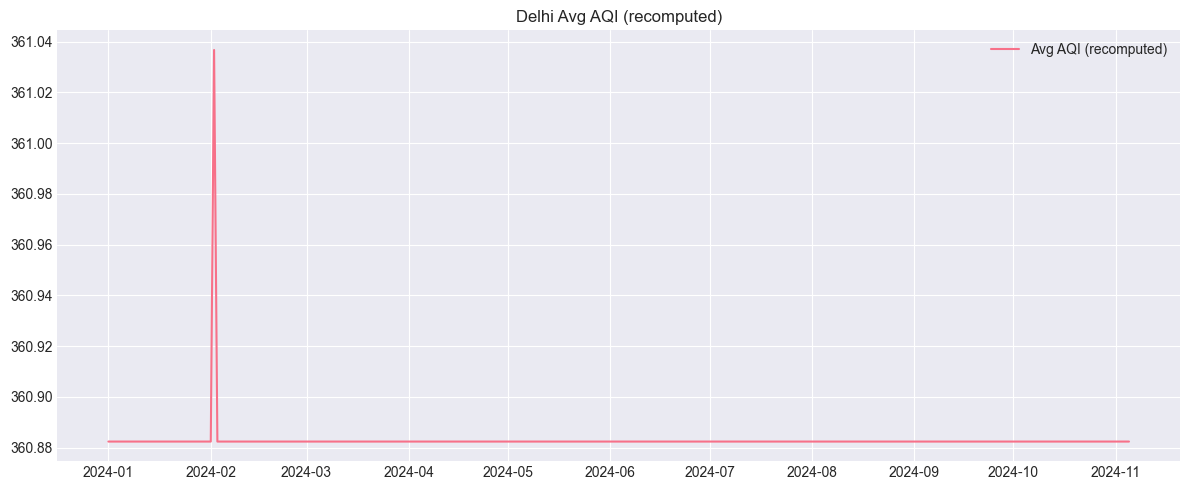

Saved merged (safe) to results/merged_recomputed_daily_safe.csv and figure to results/fire_aqi_analysis_recomputed_safe.png


In [30]:
# === Recompute merged analyses (robust) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load recomputed AQI daily
aqi = pd.read_csv('data/delhi_air_quality_2024_recomputed.csv', usecols=['city','event_timestamp','aqi_recomputed'], low_memory=False)
aqi['event_timestamp'] = pd.to_datetime(aqi['event_timestamp'], errors='coerce')
aqi = aqi.dropna(subset=['event_timestamp','aqi_recomputed'])
aqi['date'] = aqi['event_timestamp'].dt.date

daily_aqi = aqi.groupby('date')['aqi_recomputed'].mean().reset_index().rename(columns={'aqi_recomputed':'avg_aqi'})

# Recompute daily fires safely
fire = pd.read_csv('data/punjab_fires_2024.csv', low_memory=False)
for c in ['latitude','longitude','frp']:
    if c in fire.columns:
        fire[c] = pd.to_numeric(fire[c], errors='coerce')
fire['acq_date'] = pd.to_datetime(fire['acq_date'], errors='coerce')
fire['date'] = fire['acq_date'].dt.date
# compute distance if missing
if 'distance_to_delhi' not in fire.columns:
    DELHI_LAT, DELHI_LON = 28.6139, 77.2090
    fire['distance_to_delhi'] = np.sqrt((fire['latitude']-DELHI_LAT)**2 + (fire['longitude']-DELHI_LON)**2)*111

daily_fires2 = fire.groupby('date').agg(fire_count=('latitude','count'), avg_frp=('frp','mean'), total_frp=('frp','sum'), avg_distance=('distance_to_delhi','mean')).reset_index()

# Recompute daily wind safely
wind = pd.read_csv('data/wind_speed_punjab_2024.csv', low_memory=False)
wind['Data Acquisition Time'] = pd.to_datetime(wind['Data Acquisition Time'], errors='coerce')
wind['date'] = wind['Data Acquisition Time'].dt.date
wind['Telemetry Hourly Wind Speed (Km/Hr)'] = pd.to_numeric(wind['Telemetry Hourly Wind Speed (Km/Hr)'], errors='coerce')
daily_wind2 = wind.groupby('date').agg(avg_wind_speed=('Telemetry Hourly Wind Speed (Km/Hr)','mean'), max_wind_speed=('Telemetry Hourly Wind Speed (Km/Hr)','max')).reset_index()

merged_re2 = daily_aqi.merge(daily_fires2, on='date', how='left').merge(daily_wind2, on='date', how='left').fillna(0)
merged_re2.to_csv('results/merged_recomputed_daily_safe.csv', index=False)

# Simple plots
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12,5))
plt.plot(pd.to_datetime(merged_re2['date']), merged_re2['avg_aqi'], label='Avg AQI (recomputed)')
plt.title('Delhi Avg AQI (recomputed)')
plt.legend()
plt.tight_layout()
plt.savefig('results/fire_aqi_analysis_recomputed_safe.png', dpi=200)
plt.show()

print('Saved merged (safe) to results/merged_recomputed_daily_safe.csv and figure to results/fire_aqi_analysis_recomputed_safe.png')

In [29]:
# === Recompute merged analyses using recomputed AQI ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load recomputed data
aqi_fp = 'data/delhi_air_quality_2024_recomputed.csv'
aqi_df_re = pd.read_csv(aqi_fp, low_memory=False)
aqi_df_re['event_timestamp'] = pd.to_datetime(aqi_df_re['event_timestamp'], errors='coerce')
aqi_df_re = aqi_df_re.dropna(subset=['event_timestamp','aqi_recomputed'])
aqi_df_re['date'] = aqi_df_re['event_timestamp'].dt.date

# Daily AQI (Delhi average)
daily_aqi_re = aqi_df_re.groupby('date')['aqi_recomputed'].mean().reset_index().rename(columns={'aqi_recomputed':'avg_aqi'})

# Reuse existing daily_fires and daily_wind (computed earlier in notebook). If not, recompute.
# Ensure daily_fires exists; recompute from file
fire_df = pd.read_csv('data/punjab_fires_2024.csv', low_memory=False)
fire_df['acq_date'] = pd.to_datetime(fire_df['acq_date'], errors='coerce')
fire_df['date'] = fire_df['acq_date'].dt.date
for col in ['latitude','longitude','frp']:
    if col in fire_df.columns:
        fire_df[col] = pd.to_numeric(fire_df[col], errors='coerce')
# compute distance_to_delhi if missing
if 'distance_to_delhi' not in fire_df.columns:
    DELHI_LAT, DELHI_LON = 28.6139, 77.2090
    fire_df['distance_to_delhi'] = np.sqrt((fire_df['latitude'] - DELHI_LAT)**2 + (fire_df['longitude'] - DELHI_LON)**2) * 111

daily_fires = fire_df.groupby('date').agg(
    fire_count=('latitude','count'),
    avg_frp=('frp','mean'),
    total_frp=('frp','sum'),
    avg_distance=('distance_to_delhi','mean')
).reset_index()

# Ensure daily_wind exists; recompute from file
wind_df = pd.read_csv('data/wind_speed_punjab_2024.csv', low_memory=False)
wind_df['Data Acquisition Time'] = pd.to_datetime(wind_df['Data Acquisition Time'], errors='coerce')
wind_df['date'] = wind_df['Data Acquisition Time'].dt.date
wind_df['Telemetry Hourly Wind Speed (Km/Hr)'] = pd.to_numeric(wind_df['Telemetry Hourly Wind Speed (Km/Hr)'], errors='coerce')
daily_wind = wind_df.groupby('date').agg(avg_wind_speed=('Telemetry Hourly Wind Speed (Km/Hr)','mean'), max_wind_speed=('Telemetry Hourly Wind Speed (Km/Hr)','max')).reset_index()

merged_re = daily_aqi_re.merge(daily_fires, on='date', how='left').merge(daily_wind, on='date', how='left').fillna(0)

# Simple plots
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(2,1, figsize=(14,8))
ax[0].plot(pd.to_datetime(merged_re['date']), merged_re['avg_aqi'], 'r-', label='Avg AQI (Delhi - recomputed)')
ax[0].set_title('Delhi Avg AQI (recomputed)')
ax[0].legend()

ax[1].plot(pd.to_datetime(merged_re['date']), merged_re['fire_count'], 'orange', label='Fire Count (Punjab)')
ax[1].set_title('Punjab Fire Count')
ax[1].legend()
plt.tight_layout()
plt.savefig('results/fire_aqi_analysis_recomputed.png', dpi=200)
plt.show()

# Correlations
print('\nCorrelations (recomputed AQI):')
print('Fire Count ↔ AQI:', merged_re['fire_count'].corr(merged_re['avg_aqi']))
print('Total FRP ↔ AQI:', merged_re['total_frp'].corr(merged_re['avg_aqi']))
print('Wind Speed ↔ AQI:', merged_re['avg_wind_speed'].corr(merged_re['avg_aqi']))

merged_re.to_csv('results/merged_recomputed_daily.csv', index=False)
print('\nSaved merged recomputed daily data to results/merged_recomputed_daily.csv and figure to results/fire_aqi_analysis_recomputed.png')

KeyError: "Column(s) ['distance_to_delhi'] do not exist"

In [27]:
# === Investigate why recomputed daily AQI shows no spikes ===
import pandas as pd

fp = 'data/delhi_air_quality_2024_recomputed.csv'
df = pd.read_csv(fp, low_memory=False)
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], errors='coerce')
df = df.dropna(subset=['event_timestamp','aqi_recomputed'])
df['date'] = df['event_timestamp'].dt.date

# daily mean per region
daily = df.groupby(['city','date'])['aqi_recomputed'].mean().reset_index().rename(columns={'city':'region','aqi_recomputed':'aqi'})

# Check how many unique daily AQI values per region
nunique_daily = daily.groupby('region')['aqi'].nunique().reset_index(name='daily_aqi_nunique').sort_values('daily_aqi_nunique')
print('Regions with single unique daily AQI:')
print(nunique_daily[nunique_daily['daily_aqi_nunique']==1].to_string(index=False))

# Show sample daily values for Anand Vihar and a region with variation
for region in ['Anand Vihar','Wazirpur']:
    if region in daily['region'].unique():
        vals = daily[daily['region']==region].sort_values('date')
        print(f"\nSample daily AQI for {region} (first 10 rows):")
        print(vals.head(10).to_string(index=False))

# Save summary
nunique_daily.to_csv('results/recomputed_daily_aqi_nunique_per_region.csv', index=False)
print('\nSaved per-region daily aqi nunique summary to results/recomputed_daily_aqi_nunique_per_region.csv')

Regions with single unique daily AQI:
                            region  daily_aqi_nunique
                       Anand Vihar                  1
                            Burari                  1
                      Jahangirpuri                  1
          Jawaharlal Nehru Stadium                  1
                           Jhilmil                  1
                        Lodhi Road                  1
Major Dhyan Chand National Stadium                  1
                       Mandir Marg                  1
                      Mathura Road                  1
                      North Campus                  1
                        Parparganj                  1
                              Pusa                  1
                        R.K. Puram                  1
                         Siri Fort                  1
                       Sonia Vihar                  1
                      Sriniwaspuri                  1
                          Wazirpur          

In [28]:
# === Verify PM values distribution for sample regions ===
fp = 'data/delhi_air_quality_2024_recomputed.csv'
df = pd.read_csv(fp, low_memory=False)
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], errors='coerce')
df['date'] = df['event_timestamp'].dt.date

for region in ['Anand Vihar','Wazirpur']:
    sub = df[df['city']==region]
    print(f"\nRegion: {region} — total rows: {len(sub)}")
    print('pm25 unique (count, sample):', sub['pm25'].nunique(), sub['pm25'].unique()[:10])
    print('pm10 unique (count, sample):', sub['pm10'].nunique(), sub['pm10'].unique()[:10])
    dpm25 = sub.groupby('date')['pm25'].mean().reset_index()
    print('Daily pm25 nunique:', dpm25['pm25'].nunique())
    print('Daily pm25 first 6:', dpm25.head(6).to_string(index=False))
    dpm10 = sub.groupby('date')['pm10'].mean().reset_index()
    print('Daily pm10 nunique:', dpm10['pm10'].nunique())
    print('Daily pm10 first 6:', dpm10.head(6).to_string(index=False))



Region: Anand Vihar — total rows: 7431
pm25 unique (count, sample): 1 [240.]
pm10 unique (count, sample): 1 [561.]
Daily pm25 nunique: 1
Daily pm25 first 6:       date  pm25
2024-01-01 240.0
2024-01-02 240.0
2024-01-03 240.0
2024-01-04 240.0
2024-01-05 240.0
2024-01-06 240.0
Daily pm10 nunique: 1
Daily pm10 first 6:       date  pm10
2024-01-01 561.0
2024-01-02 561.0
2024-01-03 561.0
2024-01-04 561.0
2024-01-05 561.0
2024-01-06 561.0

Region: Wazirpur — total rows: 7430
pm25 unique (count, sample): 1 [195.]
pm10 unique (count, sample): 1 [170.]
Daily pm25 nunique: 1
Daily pm25 first 6:       date  pm25
2024-01-01 195.0
2024-01-02 195.0
2024-01-03 195.0
2024-01-04 195.0
2024-01-05 195.0
2024-01-06 195.0
Daily pm10 nunique: 1
Daily pm10 first 6:       date  pm10
2024-01-01 170.0
2024-01-02 170.0
2024-01-03 170.0
2024-01-04 170.0
2024-01-05 170.0
2024-01-06 170.0


In [23]:
# === Diagnostic: inspect pollutant columns and duplicates ===
import pandas as pd
raw_fp = 'data/delhi_air_quality_feature_store_unprocessed.csv'
print('Loading', raw_fp)
raw = pd.read_csv(raw_fp, low_memory=False)
print('Shape:', raw.shape)
print('\nColumns:')
print(raw.columns.tolist())

candidates = [c for c in raw.columns if any(x in c.lower() for x in ['pm','pm2','pm25','pm10','concen','value','aq'])]
print('\nCandidate pollutant/aq columns:', candidates)

# Normalize column names for checking
check_cols = ['aqi','pm25','pm10','pm2_5','pm_2_5']
found = {c: [col for col in raw.columns if c.replace('_','') in col.replace('_','').lower()] for c in check_cols}
print('\nFound columns mapping (approx):')
for k,v in found.items():
    print(f'  {k}: {v}')

# Test numeric conversion and per-region variability for top candidates
region_col = 'city' if 'city' in raw.columns else ('region' if 'region' in raw.columns else ('location_id' if 'location_id' in raw.columns else None))
print('\nRegion column:', region_col)

for col in candidates:
    try:
        raw[col+'_num'] = pd.to_numeric(raw[col], errors='coerce')
        stats = raw.groupby(region_col)[col+'_num'].agg(['count','nunique','min','max','mean','std']).reset_index().sort_values('nunique')
        print(f"\nColumn: {col} — sample nunique per-region (first 8 rows):")
        print(stats.head(8).to_string(index=False))
    except Exception as e:
        print('Error processing', col, e)

# Check duplicates per region + timestamp
if 'event_timestamp' in raw.columns:
    raw['event_timestamp'] = pd.to_datetime(raw['event_timestamp'], errors='coerce')
    dup = raw.groupby([region_col,'event_timestamp']).size().reset_index(name='counts')
    dup_multi = dup[dup['counts']>1]
    print('\nNumber of (region, timestamp) groups with multiple rows:', len(dup_multi))
    if len(dup_multi)>0:
        print(dup_multi.head(10).to_string(index=False))
else:
    print('\nNo event_timestamp column to check duplicates')

# Show sample rows for Anand Vihar
sample_region = 'Anand Vihar'
if sample_region in raw[region_col].unique():
    print(f"\nSample rows for {sample_region}:")
    print(raw[raw[region_col]==sample_region].head(10).to_string(index=False))
else:
    print(f"\nRegion {sample_region} not found in raw data; showing first region instead")
    first_reg = raw[region_col].unique()[0]
    print(raw[raw[region_col]==first_reg].head(10).to_string(index=False))

Loading data/delhi_air_quality_feature_store_unprocessed.csv
Shape: (4468848, 15)

Columns:
['location_id', 'city', 'event_timestamp', 'temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction', 'pm25', 'pm10', 'no2', 'so2', 'o3', 'co', 'aqi']

Candidate pollutant/aq columns: ['pm25', 'pm10', 'aqi']

Found columns mapping (approx):
  aqi: ['aqi']
  pm25: ['pm25']
  pm10: ['pm10']
  pm2_5: ['pm25']
  pm_2_5: ['pm25']

Region column: city

Column: pm25 — sample nunique per-region (first 8 rows):
        city  count  nunique   min   max  mean  std
 Civil Lines      0        0   NaN   NaN   NaN  NaN
       IHBAS      0        0   NaN   NaN   NaN  NaN
         ITO      0        0   NaN   NaN   NaN  NaN
      Burari 215514        1 160.0 160.0 160.0  0.0
Mathura Road 215514        1 217.0 217.0 217.0  0.0
North Campus 215514        1 164.0 164.0 164.0  0.0
  Lodhi Road 215514        1 159.0 159.0 159.0  0.0
   Siri Fort 215514        1 193.0 193.0 193.0  0.0

Column: pm10 — sample

In [24]:
# === Check PM2.5 / PM10 variability in raw data ===
import pandas as pd
cols = ['city','event_timestamp','pm25','pm10']
raw_small = pd.read_csv('data/delhi_air_quality_feature_store_unprocessed.csv', usecols=lambda c: c.lower() in [x.lower() for x in cols])
raw_small['pm25'] = pd.to_numeric(raw_small['pm25'], errors='coerce')
raw_small['pm10'] = pd.to_numeric(raw_small['pm10'], errors='coerce')

pm_stats = raw_small.groupby('city').agg(
    pm25_count=('pm25','count'), pm25_nunique=('pm25','nunique'), pm25_min=('pm25','min'), pm25_max=('pm25','max'),
    pm10_count=('pm10','count'), pm10_nunique=('pm10','nunique'), pm10_min=('pm10','min'), pm10_max=('pm10','max')
).reset_index().sort_values(['pm25_nunique','pm10_nunique'], ascending=[True, True])
pm_stats.to_csv('results/pm25_pm10_region_stats.csv', index=False)
print('Saved pm stats to results/pm25_pm10_region_stats.csv')
print(pm_stats.head(20).to_string(index=False))

Saved pm stats to results/pm25_pm10_region_stats.csv
                              city  pm25_count  pm25_nunique  pm25_min  pm25_max  pm10_count  pm10_nunique  pm10_min  pm10_max
                       Civil Lines           0             0       NaN       NaN           0             0       NaN       NaN
                             IHBAS           0             0       NaN       NaN           0             0       NaN       NaN
                               ITO           0             0       NaN       NaN           0             0       NaN       NaN
                            Burari      215514             1     160.0     160.0           0             0       NaN       NaN
                        Lodhi Road      215514             1     159.0     159.0      215514             1     134.0     134.0
                      Mathura Road      215514             1     217.0     217.0      215514             1     233.0     233.0
                      North Campus      215514            

In [1]:
import pandas as pd

new_df = pd.read_csv('data/delhi_aqi_new.csv')
new_df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [6]:
new_df.isnull().sum()

Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

In [2]:
df_24 = new_df[new_df['Year'] == 2024]
df_24.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
1095,1,1,2024,0,1,71.18,288.33,24.09,21.92,0.74,19.30,244
1096,2,1,2024,0,2,76.61,290.95,26.95,22.19,0.64,20.15,259
1097,3,1,2024,0,3,81.94,308.65,26.41,22.01,1.03,19.65,246
1098,4,1,2024,0,4,86.58,349.36,21.61,22.18,1.02,19.19,324
1099,5,1,2024,0,5,64.61,267.06,19.80,22.36,0.85,19.28,246


In [4]:
len(df_24)

366

In [5]:
df_24.isnull().sum()	

Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

In [7]:
df_24.to_csv('data/delhi_air_quality_2024_recomputed.csv', index=False)

### Monthly 'aqu' — mean, min, max

Plot monthly mean and min/max range of the `aqu` variable from `df_24`.

The code cell that follows computes monthly aggregates (mean, min, max) and displays a line for the mean with a shaded band showing the min–max range.

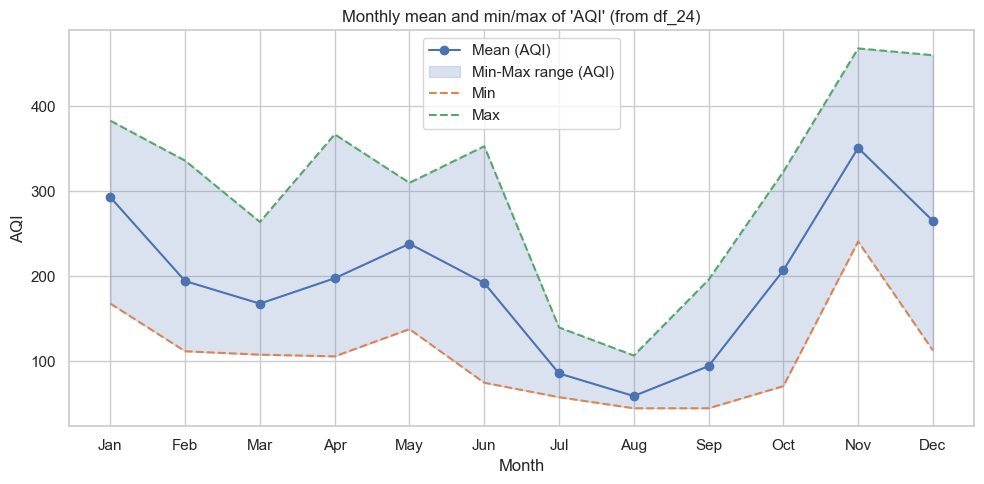

,month_num,mean,min,max,month_name
0,1,292.967742,168,383,Jan
1,2,194.517241,112,336,Feb
2,3,167.967742,108,264,Mar
3,4,197.800000,106,367,Apr
4,5,238.387097,138,310,May
5,6,192.233333,75,353,Jun
6,7,85.935484,58,140,Jul
7,8,59.354839,45,107,Aug
8,9,94.500000,45,196,Sep
9,10,207.064516,71,323,Oct


In [10]:
# Compute monthly mean/min/max of `aqu` or `AQI` and plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

_df = df_24.copy()

# choose the column to plot (support various spellings)
if 'aqu' in _df.columns:
    val_col = 'aqu'
elif 'AQI' in _df.columns:
    val_col = 'AQI'
elif 'aqi' in _df.columns:
    val_col = 'aqi'
else:
    raise KeyError("Neither 'aqu' nor 'AQI' column found in df_24. Columns: {}".format(_df.columns.tolist()))

# Create month number column robustly (look for 'Month' or 'Date')
if 'Month' in _df.columns:
    parsed = pd.to_datetime(_df['Month'], format='%b', errors='coerce')
    if parsed.isnull().all():
        parsed = pd.to_datetime(_df['Month'], format='%B', errors='coerce')
    if parsed.isnull().all():
        try:
            _df['month_num'] = _df['Month'].astype(int)
        except Exception:
            _df['month_num'] = pd.to_datetime(_df['Month'], errors='coerce').dt.month
    else:
        _df['month_num'] = parsed.dt.month
elif 'Date' in _df.columns:
    _df['month_num'] = pd.to_datetime(_df['Date'], errors='coerce').dt.month
else:
    # Try index
    try:
        _df['month_num'] = pd.to_datetime(_df.index, errors='coerce').month
    except Exception:
        raise KeyError("No 'Month' or 'Date' column found to extract month numbers. Please add one.")

# Drop missing values and ensure integer month
_df = _df.dropna(subset=['month_num', val_col])
_df['month_num'] = _df['month_num'].astype(int)

# Aggregate
agg = _df.groupby('month_num')[val_col].agg(mean='mean', min='min', max='max').reset_index()
agg['month_name'] = agg['month_num'].apply(lambda x: calendar.month_abbr[x])
agg = agg.sort_values('month_num')

# Plot
sns.set(style='whitegrid')
plt.figure(figsize=(10,5))
plt.plot(agg['month_name'], agg['mean'], marker='o', label=f'Mean ({val_col})', color='C0')
plt.fill_between(agg['month_name'], agg['min'], agg['max'], color='C0', alpha=0.2, label=f'Min-Max range ({val_col})')
plt.plot(agg['month_name'], agg['min'], linestyle='--', color='C1', label='Min')
plt.plot(agg['month_name'], agg['max'], linestyle='--', color='C2', label='Max')
plt.xlabel('Month')
plt.ylabel(val_col)
plt.title(f"Monthly mean and min/max of '{val_col}' (from df_24)")
plt.legend()
plt.tight_layout()
plt.show()

# Display aggregated table
from IPython.display import display
display(agg)


In [9]:
# Diagnostic: inspect df_24 columns and first rows to find the AQ column name
print('columns:', df_24.columns.tolist())
print('\nSample rows:')
df_24.head(8)

columns: ['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']

Sample rows:


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
1095,1,1,2024,0,1,71.18,288.33,24.09,21.92,0.74,19.30,244
1096,2,1,2024,0,2,76.61,290.95,26.95,22.19,0.64,20.15,259
1097,3,1,2024,0,3,81.94,308.65,26.41,22.01,1.03,19.65,246
1098,4,1,2024,0,4,86.58,349.36,21.61,22.18,1.02,19.19,324
1099,5,1,2024,0,5,64.61,267.06,19.80,22.36,0.85,19.28,246
1100,6,1,2024,0,6,78.21,319.32,20.70,22.47,0.80,19.64,220
1101,7,1,2024,1,7,80.76,334.34,27.08,22.90,0.93,19.93,308
1102,8,1,2024,0,1,95.24,373.77,24.92,22.87,0.85,19.55,314
